# 1 - Context:
  Fifa is one of the most popular games in the world and Fifa Ultimate Team definetly takes the number 1 spot as the most popular game mode in it. It is a mode that combines the gameplay skill by itself, but also the capacity to build the best team possible.
<br>
<br>
In order to build the best team, gamers use their coins, earned playing matches, in a real trading market, where you are free to list the players you have for whatever price you want (given some lenient restrictions) and also buy whoever you want for the price you think is fair. All that run by real people and real interactions, making the price follow beautifully supply and demand
<br>
<br>
Below is an example of different Kevin De Bruyne for sale. You can choose the cheaper one and buy them either bidding and waiting for the time to expire or going for the buy now price, which is more common.

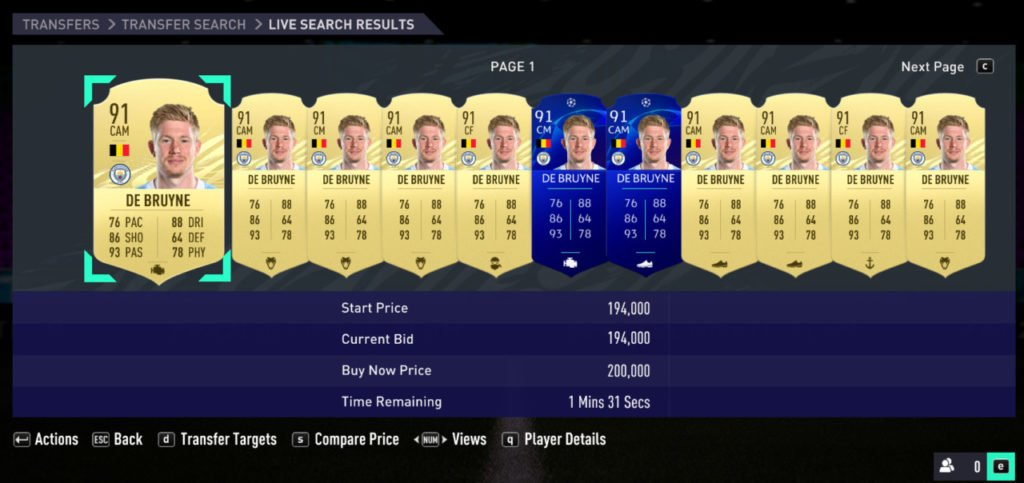

In [1]:
from IPython.display import Image
Image(filename='Image1-market.jpeg')

As any football game, the better your team is, the higher the chance you are winning the matches. However, on Ultimate Team, building a great team is very expensive and takes many games to get the coins needed. Fortunately, there is a shortcut to that.
<br>
<br>
As we are talking about a real market, you can get the coins you need simply by trading. For instance, you could by that De Bruyne for 200K and sell for 220K and you can repeat it as long as you wish. 
<br>
<br>
Yet, trading is not as easy as it seems. It requires experience to understand which players to buy, when to buy and for how much and, also, when to sell and for how much to sell. But what if you don't have the experience, how can you trade?
<br>
<br>
Well, experience is just a matter of seeing the pattern and repeating it. Another way of getting that same pattern is analysing historical data. 
<br>
<br>
# 2 - Objective:
We will have a look at market data from previous FIFAs and try to come up with a trading guideline.

# 3 - The data source:
Futbin is a very popular website that has an API that extracts market data and displays historical prices for the community. The image below displays De Bruyne price on FIFA 21

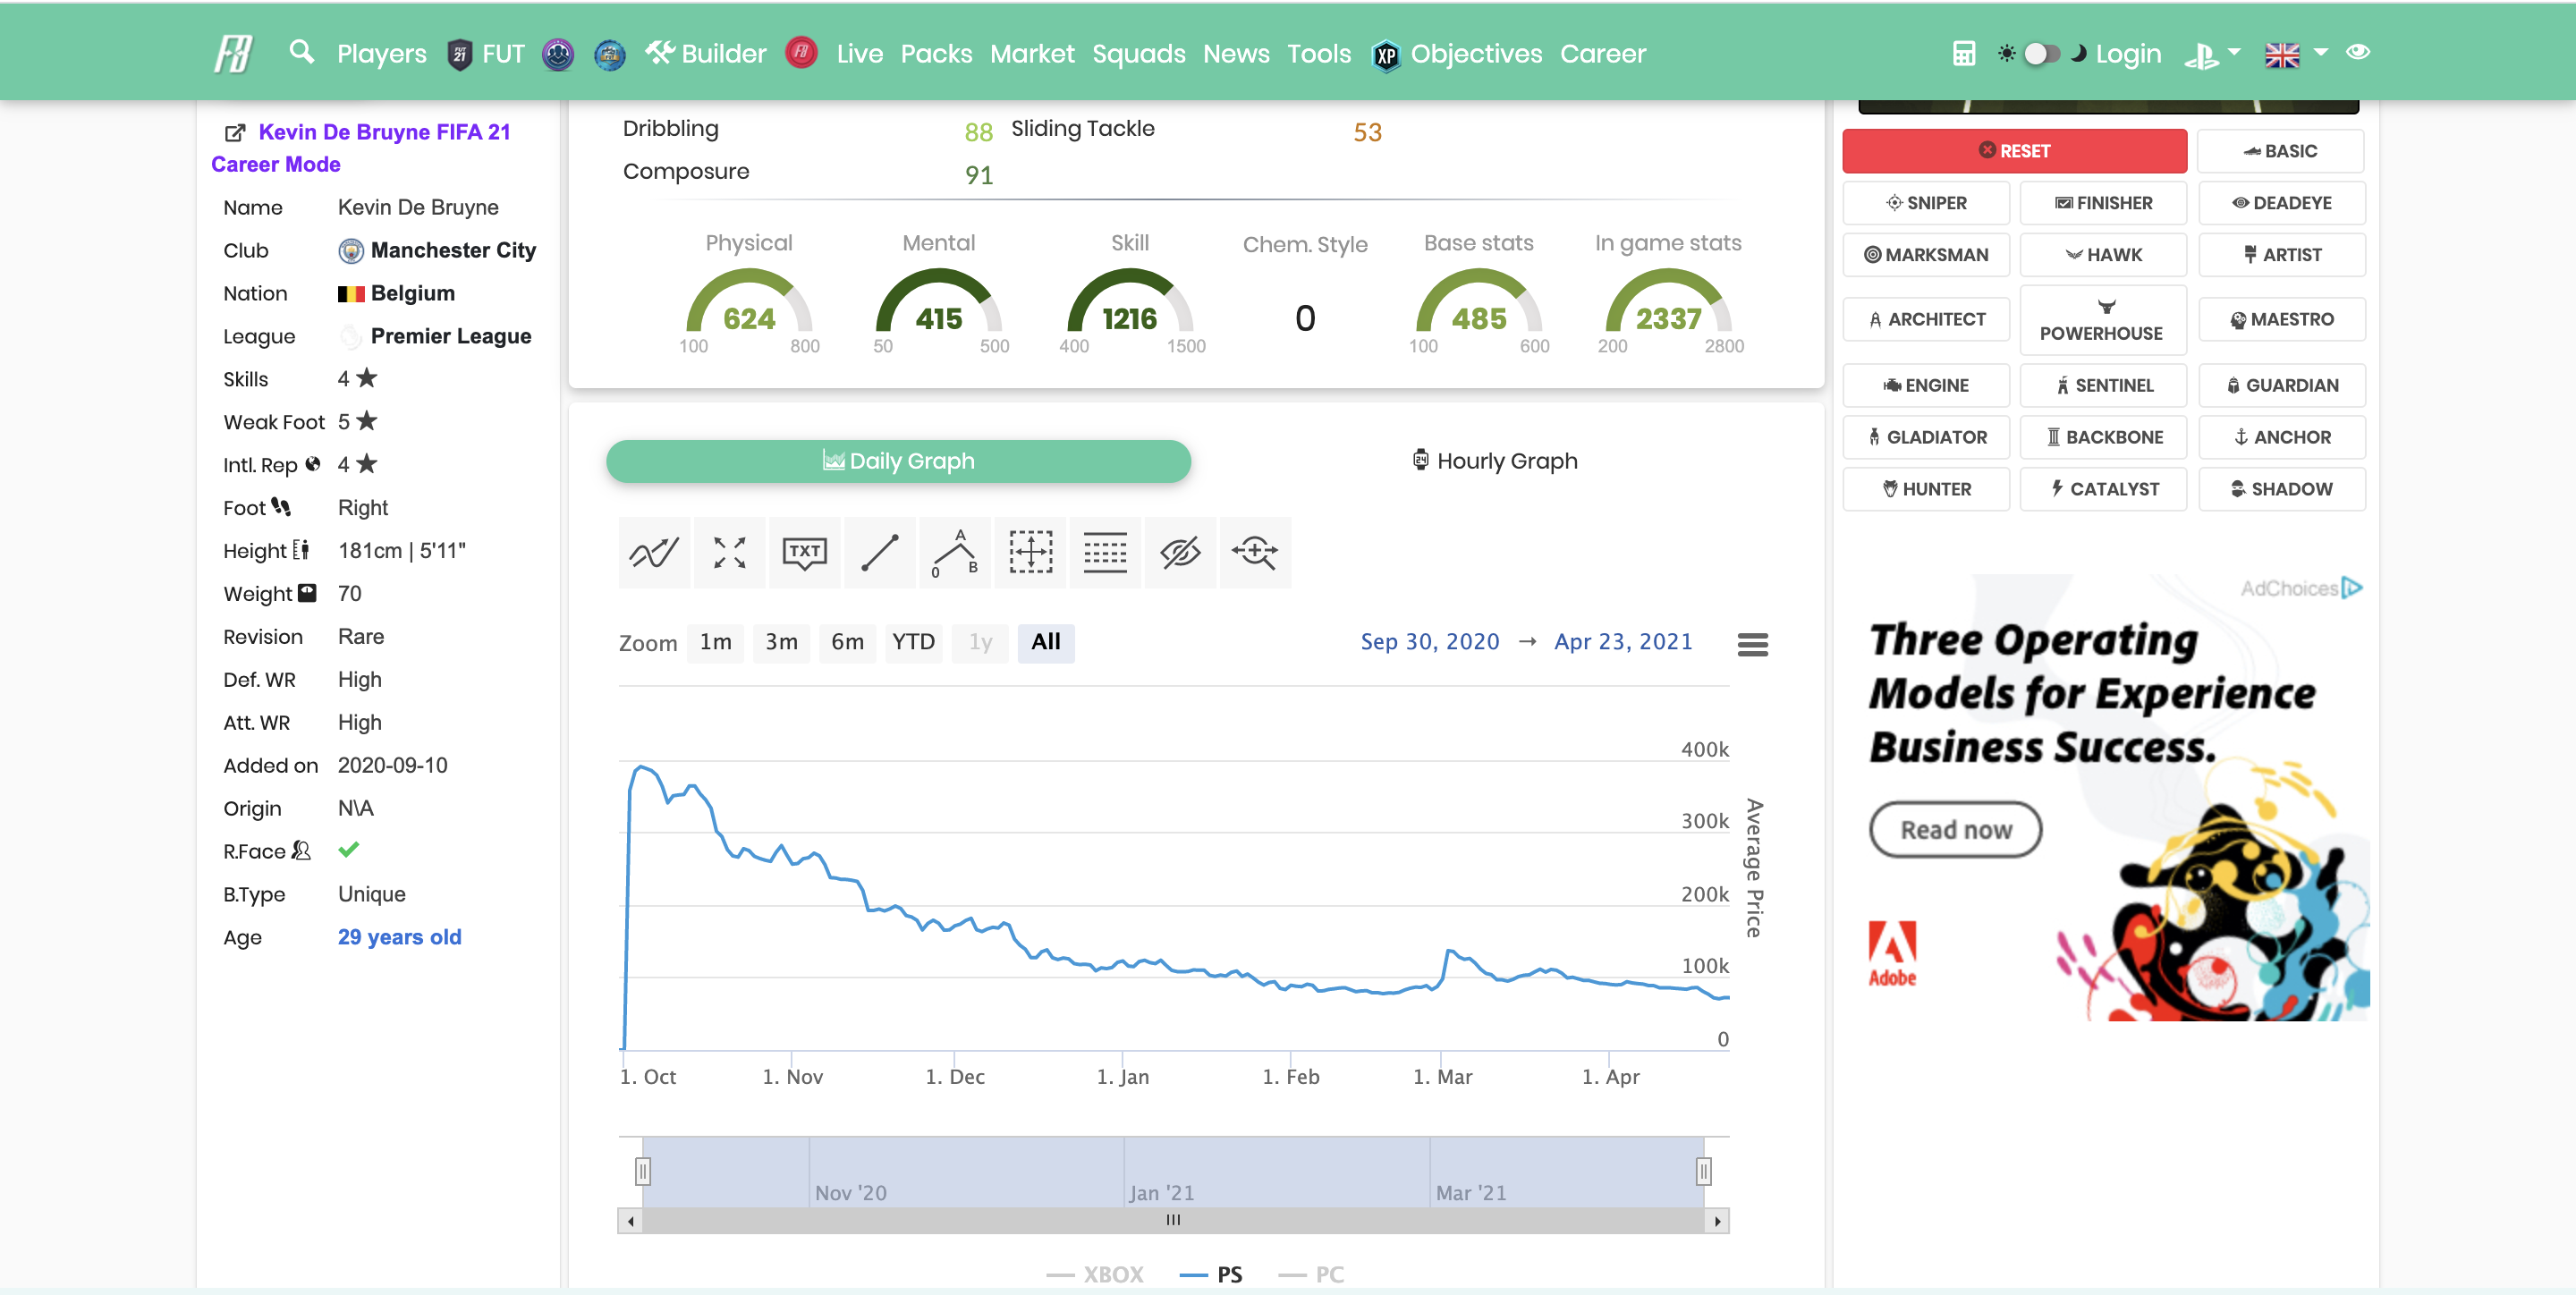

In [2]:
Image(filename='Image2-futbin.png')

Just by looking at Futbin we could get a sense on how to trade, but it is obviously better having all players data on a dataset. 
<br>
<br>
...and that's when Kaggle comes in hand. I found a dataset with players data and prices and I'll use it for the analysis.
<br>
<br>
Here is the link: https://www.kaggle.com/stefanoleone992/fifa-20-ultimate-team-player-price-comparisons/data?select=fut_bin20_prices.csv

# 4 - Understanding the data structure:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import fklearn, matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

In [30]:
#Importing the data
players19 = pd.read_csv('fut_bin19_players.csv')
players20 = pd.read_csv('fut_bin20_players.csv')

prices19 = pd.read_csv('fut_bin19_prices.csv')
prices20 = pd.read_csv('fut_bin20_prices.csv')

In [5]:
#columns from players dataset
players20.columns

Index(['futbin_id', 'player_name', 'player_extended_name', 'quality',
       'revision', 'origin', 'overall', 'club', 'league', 'nationality',
       'position', 'age', 'date_of_birth', 'height', 'weight', 'intl_rep',
       'added_date', 'pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning', 'pref_foot', 'att_w

In [6]:
#columns from prices dataset
prices20.columns

Index(['resource_id', 'date', 'ps4', 'xbox', 'pc'], dtype='object')

In [7]:
#players head
players20.head()

futbin_id player_name          player_extended_name      quality revision  \
0          1        Pelé      Edson Arantes Nascimento  Gold - Rare     Icon   
1          2    Maradona                Diego Maradona  Gold - Rare     Icon   
2          3     Ronaldo  Ronaldo Luís Nazário de Lima  Gold - Rare     Icon   
3          4        Pelé      Edson Arantes Nascimento  Gold - Rare     Icon   
4          5    Maradona                Diego Maradona  Gold - Rare     Icon   

   origin  overall   club league nationality  ...     ps4_max  ps4_prp  \
0   Prime       98  Icons  Icons      Brazil  ...   6400000.0       63   
1   Prime       97  Icons  Icons   Argentina  ...   3700000.0       93   
2   Prime       96  Icons  Icons      Brazil  ...  15000000.0       81   
3  Medium       95  Icons  Icons      Brazil  ...   4000000.0       54   
4  Medium       95  Icons  Icons   Argentina  ...   2100000.0       65   

   xbox_last  xbox_min    xbox_max  xbox_prp pc_last     pc_min      pc_max  \
0  3499000.0  285000.0   5400000.0        62     NaN   524000.0  10000000.0   
1  2000000.0  157000.0   3000000.0        64     NaN   181000.0   3400000.0   
2        NaN  650000.0  12300000.0        68     NaN  1169000.0  15000000.0   
3  2149000.0  213000.0   4000000.0        51     NaN   280000.0   5300000.0   
4  1499000.0   93500.0   1800000.0        82     NaN   118000.0   2200000.0   

   pc_prp  
0     100  
1      67  
2      63  
3      89  
4      90  

[5 rows x 95 columns]

In [8]:
#players head
prices20.head()

resource_id        date   ps4  xbox    pc
0           41  2019-09-19  2700  2700  2700
1           41  2019-09-20  2700  2700  2700
2           41  2019-09-21  2700  2700  2700
3           41  2019-09-22  2700  2706  2700
4           41  2019-09-23  2700  2700  2700

Ok, so having a quick look at the dataset description on Kaggle and at the columns name, we can see that we have the players dataset, which has one row by player and all that player's informations. We also have the prices datasets with one row per player per date, with the average price of that day for each console.
<br>
<br>
Also, we can see that we can join both datasets using the resource_id.

# 5 - Organizing the data:
We will work only with FIFA 20 dataset for now. There are some reasons for that:
<br>
> 1 - It is the closest one from FIFA 21, which is where we want to apply the knowledge (Dataset from FIFA 21 has only 1 month of data)
<br>
> 2 - It will probably be enough for what I want, so no need to add more load on the pc for now


In [9]:
#Joinning players and prices
df20 = players20.join(prices20.set_index('resource_id'), on='resource_id')

#Converting date column from object to date
df20['date'] = df20['date'].astype('datetime64')

#Creating a week column
df20['week'] = df20['date'] - pd.to_timedelta(df20['date'].dt.dayofweek, unit='d')

#Creating a month column
df20['month'] = pd.to_datetime(df20.date).dt.to_period('M').dt.to_timestamp()

#Creating a day of week column
df20['day_of_week'] = df20['date'].dt.dayofweek #Monday = 0, Sunday = 6

In [10]:
#Checking for nulls
df20.isna().mean()

futbin_id               0.000000
player_name             0.000000
player_extended_name    0.000000
quality                 0.000000
revision                0.011691
origin                  0.863148
overall                 0.000000
club                    0.000000
league                  0.000000
nationality             0.000000
position                0.000000
age                     0.000000
date_of_birth           0.000000
height                  0.000178
weight                  0.000000
intl_rep                0.000179
added_date              0.000000
pace                    0.106438
pace_acceleration       0.008552
pace_sprint_speed       0.008552
dribbling               0.106438
drib_agility            0.008552
drib_balance            0.008552
drib_reactions          0.008552
drib_ball_control       0.008552
drib_dribbling          0.008552
drib_composure          0.008374
shooting                0.106438
shoot_positioning       0.008552
shoot_finishing         0.008552
          

In [11]:
#There are many NaN, but for now I'll only fill one column
df20['revision'].fillna("no info", inplace = True) #this will be one of the most important columns. The reason will be soon explained

In [12]:
df20.head()

futbin_id player_name      player_extended_name      quality revision  \
0          1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0          1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0          1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0          1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0          1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   

  origin  overall   club league nationality  ...    pc_min      pc_max pc_prp  \
0  Prime       98  Icons  Icons      Brazil  ...  524000.0  10000000.0    100   
0  Prime       98  Icons  Icons      Brazil  ...  524000.0  10000000.0    100   
0  Prime       98  Icons  Icons      Brazil  ...  524000.0  10000000.0    100   
0  Prime       98  Icons  Icons      Brazil  ...  524000.0  10000000.0    100   
0  Prime       98  Icons  Icons      Brazil  ...  524000.0  10000000.0    100   

        date         ps4        xbox   pc       week      month  day_of_week  
0 2019-12-20  14700000.0         0.0  0.0 2019-12-16 2019-12-01          4.0  
0 2019-12-21  13170968.0  14998000.0  0.0 2019-12-16 2019-12-01          5.0  
0 2019-12-22  13606926.0  13257636.0  0.0 2019-12-16 2019-12-01          6.0  
0 2019-12-23  11710640.0  13899900.0  0.0 2019-12-23 2019-12-01          0.0  
0 2019-12-24  11861450.0   9766667.0  0.0 2019-12-23 2019-12-01          1.0  

[5 rows x 102 columns]

In [13]:
df20.describe()

futbin_id       overall           age        height        weight  \
count  6.765877e+06  6.765877e+06  6.765877e+06  6.764670e+06  6.765877e+06   
mean   3.313640e+04  6.849814e+01  2.716945e+01  1.813266e+02  7.543619e+01   
std    8.842525e+03  8.513296e+00  5.655579e+00  6.815903e+00  7.184624e+00   
min    1.000000e+00  4.800000e+01  1.700000e+01  1.550000e+02  0.000000e+00   
25%    2.725400e+04  6.300000e+01  2.300000e+01  1.760000e+02  7.000000e+01   
50%    3.268700e+04  6.800000e+01  2.700000e+01  1.810000e+02  7.500000e+01   
75%    3.812400e+04  7.300000e+01  3.000000e+01  1.860000e+02  8.000000e+01   
max    5.096600e+04  9.900000e+01  9.000000e+01  2.050000e+02  1.100000e+02   

           intl_rep          pace  pace_acceleration  pace_sprint_speed  \
count  6.764669e+06  6.045731e+06       6.708015e+06       6.708015e+06   
mean   1.237518e+00  6.919239e+01       6.604875e+01       6.619190e+01   
std    6.508382e-01  1.189861e+01       1.532046e+01       1.509038e+01   
min    1.000000e+00  2.400000e+01       0.000000e+00       0.000000e+00   
25%    1.000000e+00  6.300000e+01       5.800000e+01       5.900000e+01   
50%    1.000000e+00  7.000000e+01       6.800000e+01       6.800000e+01   
75%    1.000000e+00  7.700000e+01       7.600000e+01       7.600000e+01   
max    5.000000e+00  9.900000e+01       9.900000e+01       9.900000e+01   

          dribbling  ...      xbox_max      xbox_prp       pc_last  \
count  6.045731e+06  ...  6.764822e+06  6.765877e+06  5.989789e+06   
mean   6.487864e+01  ...  3.231314e+04  2.803213e+01  1.011498e+04   
std    1.113969e+01  ...  2.983951e+05  3.391430e+01  1.183388e+05   
min    2.400000e+01  ... -1.000000e+00  0.000000e+00  2.000000e+02   
25%    5.900000e+01  ...  1.000000e+04  2.000000e+00  3.000000e+02   
50%    6.500000e+01  ...  1.000000e+04  1.000000e+01  7.000000e+02   
75%    7.200000e+01  ...  1.000000e+04  4.800000e+01  1.800000e+03   
max    9.900000e+01  ...  1.500000e+07  1.000000e+02  1.500000e+07   

             pc_min        pc_max        pc_prp           ps4          xbox  \
count  6.764822e+06  6.764822e+06  6.765877e+06  6.764697e+06  6.764697e+06   
mean   2.720257e+03  3.821989e+04  1.819662e+01  2.266808e+04  2.012756e+04   
std    2.614423e+04  3.772901e+05  2.883975e+01  2.593598e+05  2.279162e+05   
min   -1.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.500000e+02  1.000000e+04  1.000000e+00  2.000000e+02  0.000000e+00   
50%    1.500000e+02  1.000000e+04  4.000000e+00  5.000000e+02  0.000000e+00   
75%    3.000000e+02  1.000000e+04  2.000000e+01  1.215000e+03  7.000000e+02   
max    1.500000e+06  1.500000e+07  1.000000e+02  1.500000e+07  1.500000e+07   

                 pc   day_of_week  
count  6.764697e+06  6.764697e+06  
mean   2.324620e+04  2.974729e+00  
std    2.615395e+05  2.002846e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  1.000000e+00  
50%    0.000000e+00  3.000000e+00  
75%    0.000000e+00  5.000000e+00  
max    1.500000e+07  6.000000e+00  

[8 rows x 84 columns]

In [14]:
#It is impossible to buy a player for 0.0 coins
mask = df20['ps4'] >= 1
df20 = df20[mask]

In [15]:
df20.count()

futbin_id               6709662
player_name             6709662
player_extended_name    6709662
quality                 6709662
revision                6709662
origin                   922849
overall                 6709662
club                    6709662
league                  6709662
nationality             6709662
position                6709662
age                     6709662
date_of_birth           6709662
height                  6708461
weight                  6709662
intl_rep                6708461
added_date              6709662
pace                    5995691
pace_acceleration       6651940
pace_sprint_speed       6651940
dribbling               5995691
drib_agility            6651940
drib_balance            6651940
drib_reactions          6651940
drib_ball_control       6651940
drib_dribbling          6651940
drib_composure          6653141
shooting                5995691
shoot_positioning       6651940
shoot_finishing         6651940
                         ...   
cam     

# 6 - Understanding price behavior

/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


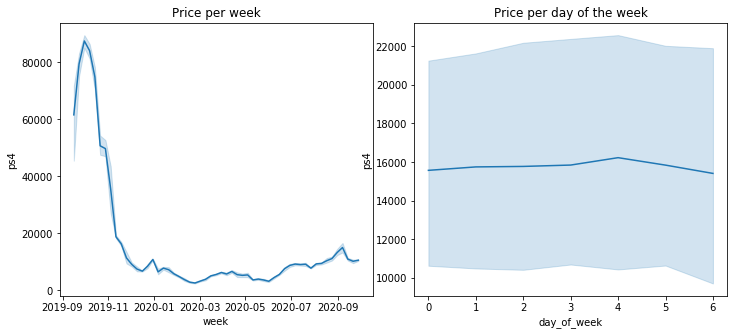

In [16]:
#Filtering only one player
mask = df20['futbin_id'] == 24235
data_player = df20[mask]

#Plotting the price
horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (10,5))
fig.tight_layout()

#Per week
plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=data_player, x="week", y="ps4").set_title('Price per week')

#Per day of the week
plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=data_player, x="day_of_week", y="ps4").set_title('Price per day of the week')


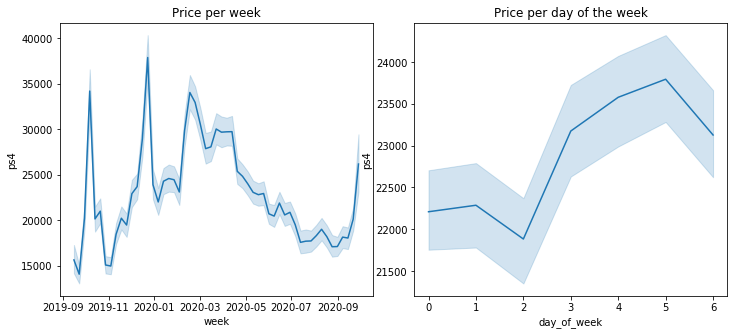

In [17]:
#Average price of the whole population

#Plotting the price
horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (10,5))
fig.tight_layout()

#Per week
plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20, x="week", y="ps4").set_title('Price per week')

#Per day of the week
plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20, x="day_of_week", y="ps4").set_title('Price per day of the week')


The average market price oscilates a lot, which is great for trading if we can find some predictable oscilations

# 7 - Exploration
We want to find clusters of players where the price is quite predictable and increases over time. In order to do so, let's explore some groupings

We have 3 main types of groupings:
> 1 - Player quality and overall: the higher the overall, the better the player tends to be and the more expensive it might be
<br>
> 2 - Player revision (card type): the market has regular cards and special ones, such as upgraded cards for being on the team of the week
<br>
> 3 - Player non skill characteristics: nation, league and position

In [18]:
#Quality types
df20['quality'].unique()

array(['Gold - Rare', 'Gold - Non-Rare', 'Silver - Rare',
       'Silver - Non-Rare', 'Bronze - Non-Rare', 'Bronze - Rare'],
      dtype=object)

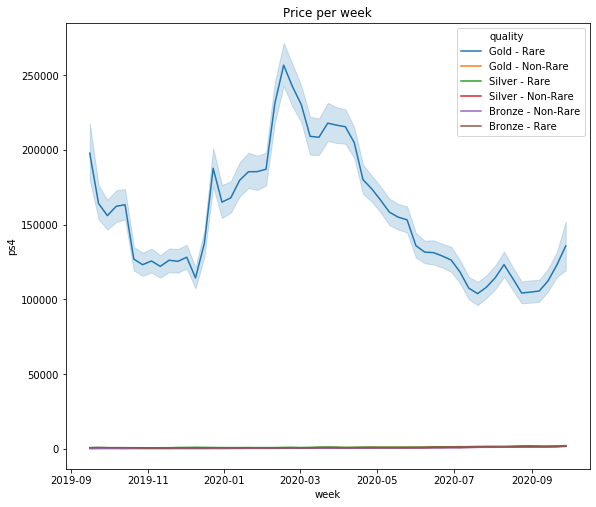

In [19]:
#Plotting the price by week by quality type
horiz = 1
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (8,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20, x="week", y="ps4", hue = 'quality').set_title('Price per week')


We can't even see the average price of non Gold Rare players given such a high difference in price. So let's split into different charts since the objective is check the trend and not the amount

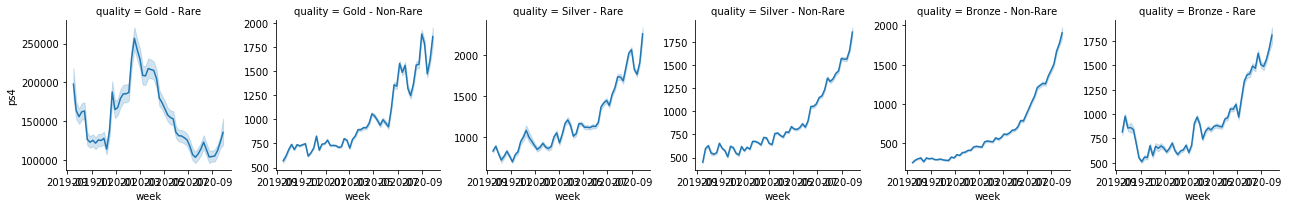

In [20]:
g = sns.FacetGrid(df20, col="quality", sharey=False)
g.map(sns.lineplot, "week", "ps4")

In [21]:
df20.groupby('quality').size()

quality
Bronze - Non-Rare    1413001
Bronze - Rare         773794
Gold - Non-Rare       495015
Gold - Rare           963670
Silver - Non-Rare    1941104
Silver - Rare        1123078
dtype: int64

We can conclude a few things from the charts above:
<br>
> 1 - Bronzes, silvers and Gold non rare average price increases on the long term
<br>
> 2 - Gold Rares are still quite confusing to understand

Grouping by overall

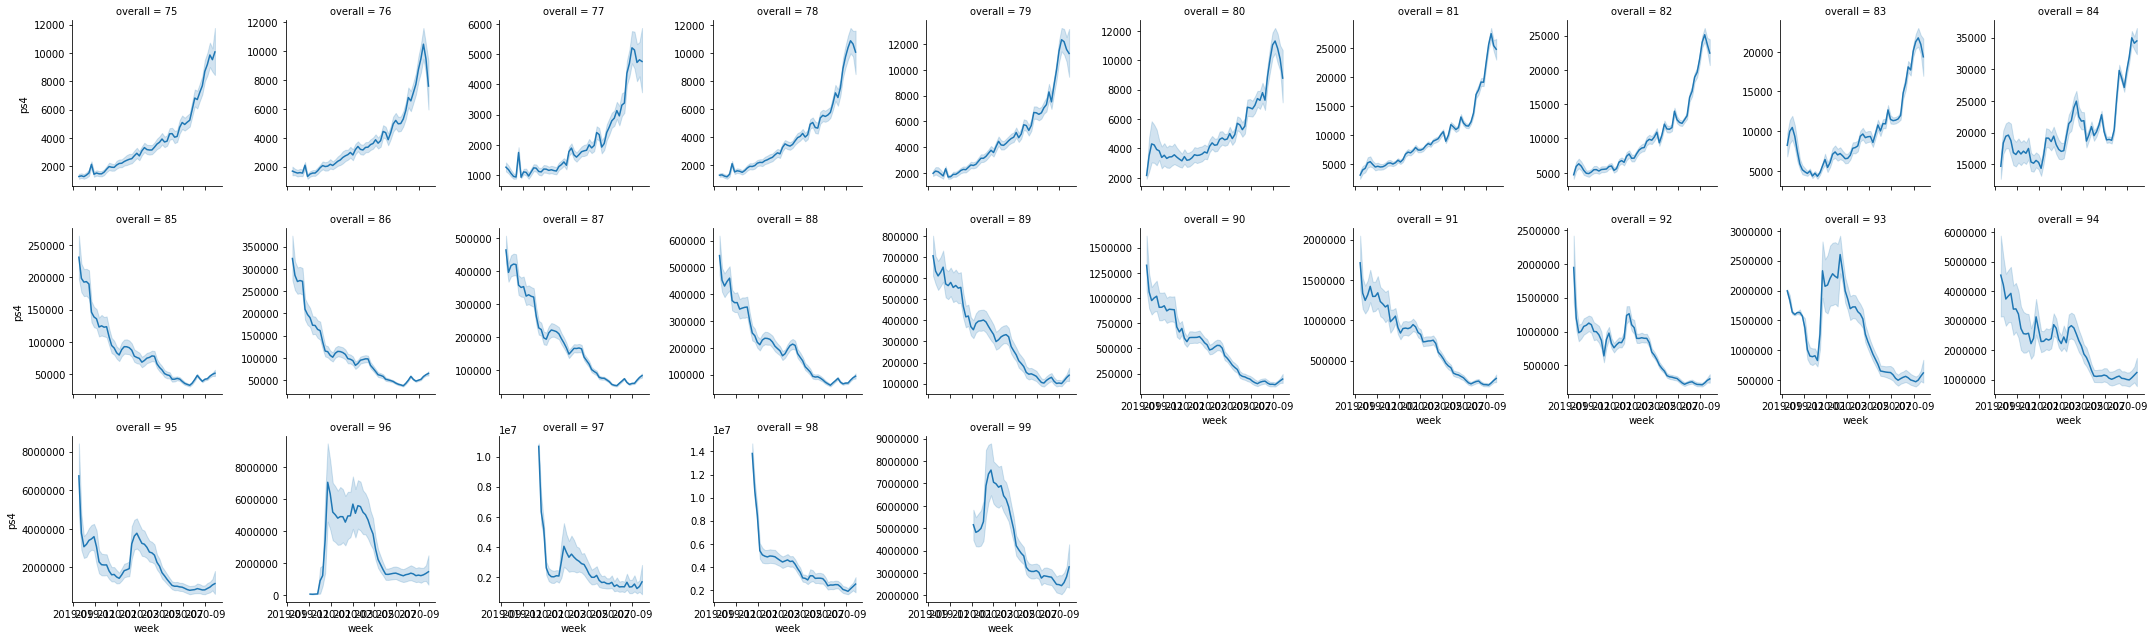

In [22]:
mask = df20['quality'] == 'Gold - Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False, col_wrap=10)
g.map(sns.lineplot, "week", "ps4")

There is a shifting point from overall 84 to 85

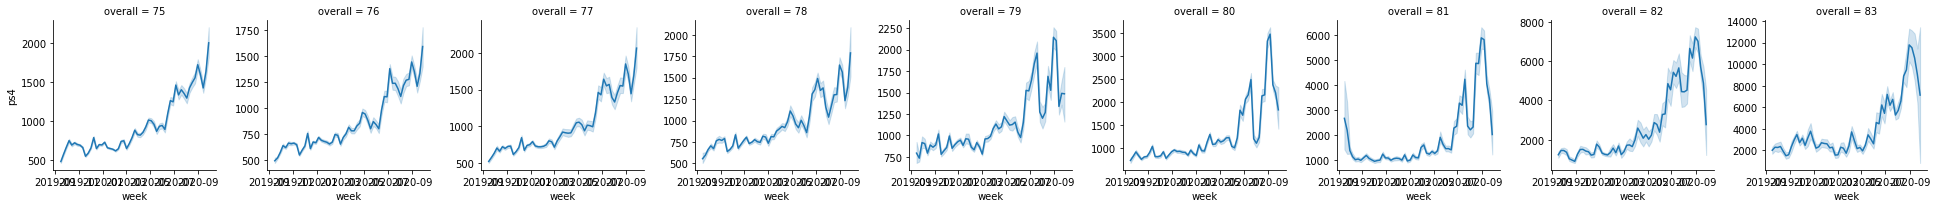

In [23]:
mask = df20['quality'] == 'Gold - Non-Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False)
g.map(sns.lineplot, "week", "ps4")

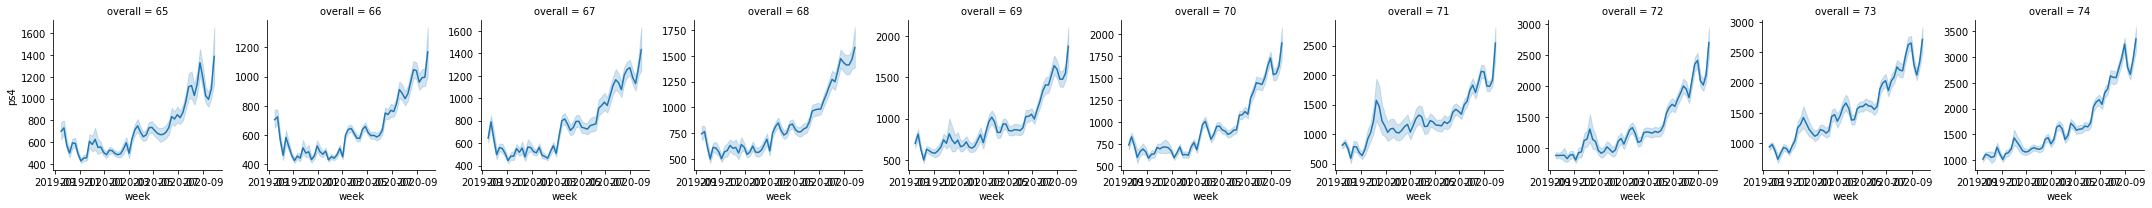

In [24]:
mask = df20['quality'] == 'Silver - Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False)
g.map(sns.lineplot, "week", "ps4")

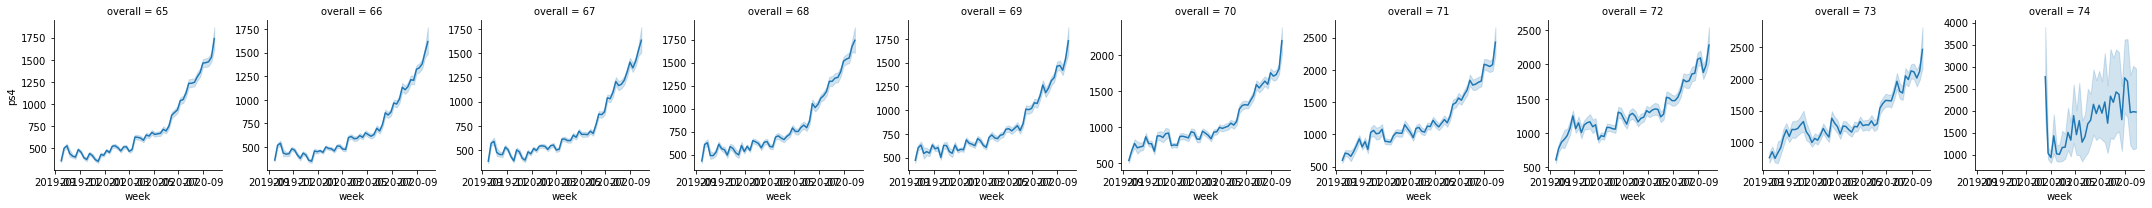

In [25]:
mask = df20['quality'] == 'Silver - Non-Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False)
g.map(sns.lineplot, "week", "ps4")

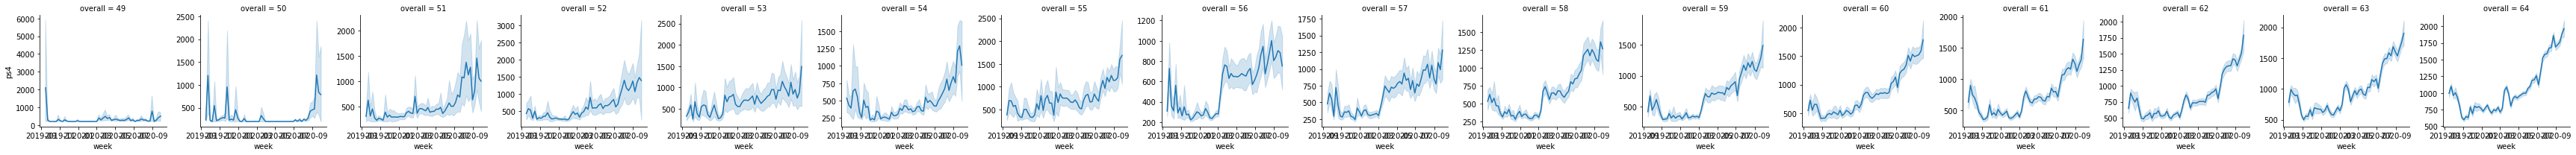

In [26]:
mask = df20['quality'] == 'Bronze - Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False)
g.map(sns.lineplot, "week", "ps4")

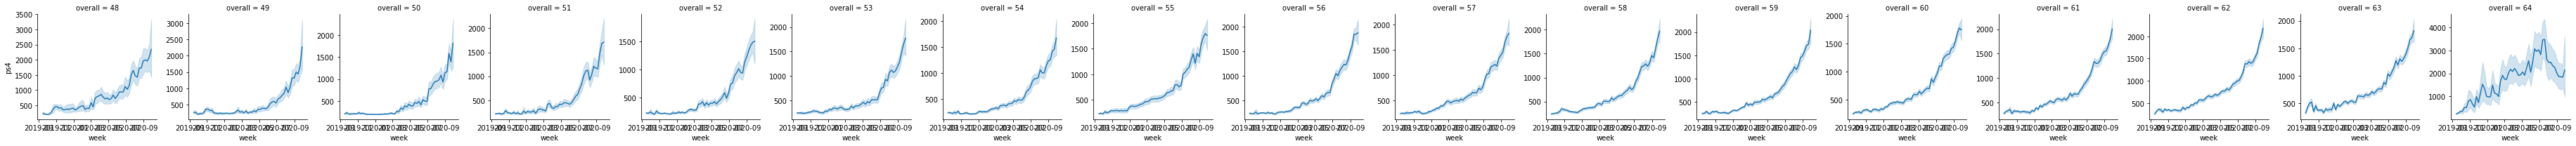

In [27]:
mask = df20['quality'] == 'Bronze - Non-Rare'
df20_gold_rare = df20[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False)
g.map(sns.lineplot, "week", "ps4")

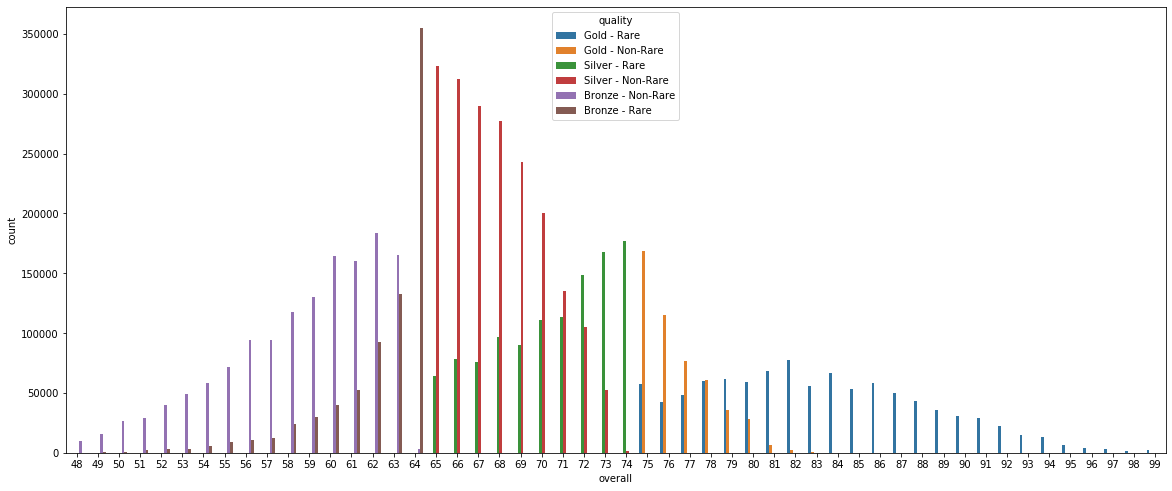

In [28]:
#Plotting the count of players by overall (not a count distinct as the goal is to have a comparable metric to the charts above)
horiz = 1
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (16,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.countplot(x="overall", hue="quality", data=df20)

Before jumping into the next step, there is one very important thing to be understood:
<br>
<br>
The charts going up on the average price by week does not necessarily mean you will be profiting. Why is that?
<br>
You will only profit if the **player you have** goes up in price. What could happen is that prices are going up not because each player price is increasing, but because **new players are joining the game week by week with a possible higher starter price than the average**
<br>
<br>
So, instead of looking at the week as the x axis, we should look at Days since player release

##### 7.1.2 : Days since release as x axis
We have the columns added date that tells when the player was added. It has no NaNs, which is great.

In [29]:
#Converting added date to date
df20['added_date'] = df20['added_date'].astype('datetime64')
df20['row_number'] = (df20['date'] - df20['added_date']).dt.days

In [30]:
df20

futbin_id player_name      player_extended_name      quality revision  \
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
0              1        Pelé  Edson Arantes Nascimento  Gold - Rare     Icon   
...          ...         ...                       ...          ...      ...   
25029      50962      Machís             Darwin Machís  Gold - Rare       IF   
25029      50962      Machís             Darwin Machís  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25030      50963       Ochoa           Guillermo Ochoa  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25031      50964      Valeri              Diego Valeri  Gold - Rare       IF   
25032      50965         Man                Dennis Man  Gold - Rare       IF   
25032      50965         Man                Dennis Man  Gold - Rare       IF   
25032  

In [31]:
#Filtering only one player
mask = df20['futbin_id'] == 1
data_pele = df20[mask]

data_pele[['player_name','added_date', 'date']].sort_values(['date'], ascending=True).head()

player_name added_date       date
0        Pelé 2018-09-19 2019-12-20
0        Pelé 2018-09-19 2019-12-21
0        Pelé 2018-09-19 2019-12-22
0        Pelé 2018-09-19 2019-12-23
0        Pelé 2018-09-19 2019-12-24

Well, apparently the added date is not exactly the first date when the player was on the market. Looking at Pelé, he was added on September, according to the dataset, but the first day on the market was on December. Let's check further

In [32]:
#Adding a row_number column
df20['row_num'] = df20.sort_values(['futbin_id', 'date'], ascending=True).groupby(['futbin_id']).cumcount() + 1

#Checking the count of players where the date on row number 1 is different from the added date
mask = df20['row_num'] == 1 #Filtering only first day of the player
df_rn_1 = df20[mask]

df_rn_1['diff_first_price_date_vs_added_date'] = (df_rn_1['date'] - df_rn_1['added_date']).dt.days #Getting the difference between dates

df_rn_1["wrong_added_date"] = np.where(df_rn_1["diff_first_price_date_vs_added_date"] != 0, 1, 0) #Simplifying the wrongs as 1

/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [33]:
df_rn_1["wrong_added_date"].mean()

0.7095962771978368

That is a high percentage

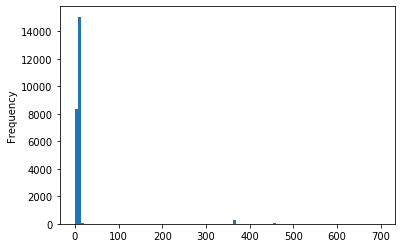

In [34]:
df_rn_1['diff_first_price_date_vs_added_date'].plot.hist(bins = 100)

Most of the wrong cases are just a few days wrong

In [35]:
df_rn_1["wrong_added_date_2"] = np.where(df_rn_1["diff_first_price_date_vs_added_date"] >= 7, 1, 0) ##Checking the percentage of wrongs >= 7
df_rn_1["wrong_added_date_2"].mean()

/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.6501907516874188

65% of all "added dates" are wrong in more than 7 days, which is high enough to not trust the column
<br>
<br>
We must create our own column then

In [36]:
#Adding cohort date column
df20_df_rn_1_short = df_rn_1[["futbin_id", "date"]]
df20_df_rn_1_short = df20_df_rn_1_short.rename(columns={"date": "cohort_date"})

df_20 = df20.join(df20_df_rn_1_short.set_index('futbin_id'), on='futbin_id')

#Adding cohort month column
df_20['cohort_month'] = pd.to_datetime(df_20.cohort_date).dt.to_period('M').dt.to_timestamp()

In [38]:
df_20['cohort_date'].describe()

count                 6709662
unique                    151
top       2019-09-19 00:00:00
freq                  3777663
first     2019-09-19 00:00:00
last      2020-09-23 00:00:00
Name: cohort_date, dtype: object

Ok, now we can proceed to use the row_num and cohort_date columns

Checking how prices behave now looking at a row number perspective

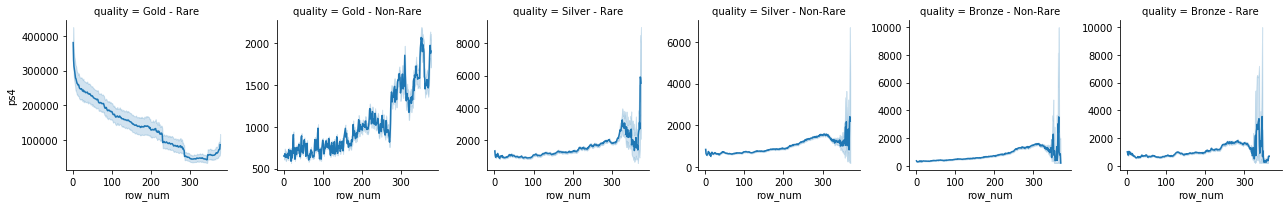

In [39]:
g = sns.FacetGrid(df_20, col="quality", sharey=False)
g.map(sns.lineplot, "row_num", "ps4")

Removing the noise from row number > 300

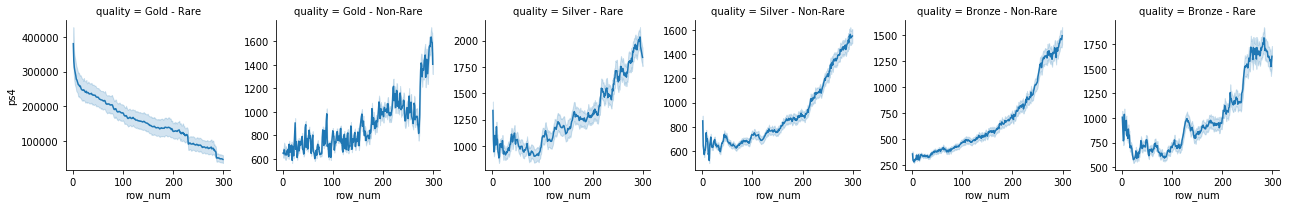

In [40]:
mask = df_20['row_num'] < 300
df_20_short = df_20[mask]

g = sns.FacetGrid(df_20_short, col="quality", sharey=False)
g.map(sns.lineplot, "row_num", "ps4")

The shape of the charts are pretty similar to the one with week as the x axis, except for the gold rare chart. That is why I'll only plot the grouped by overall for that group

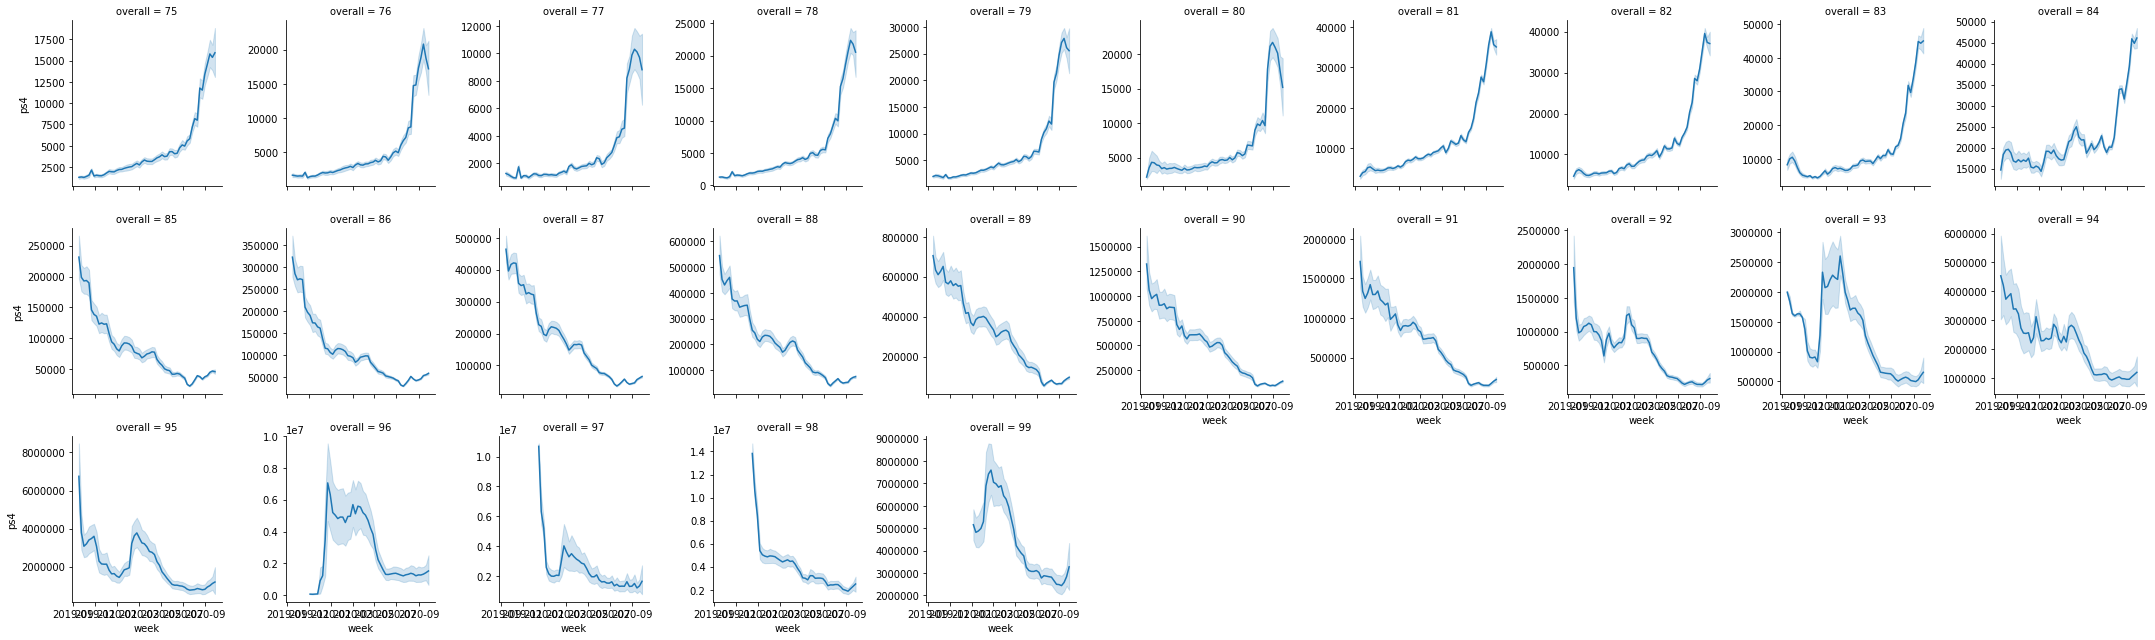

In [41]:
mask = df_20['row_num'] < 300
df_20_short = df_20[mask]

mask = df_20_short['quality'] == 'Gold - Rare'
df20_gold_rare = df_20_short[mask]

g = sns.FacetGrid(df20_gold_rare, col="overall", sharey=False, col_wrap=10)
g.map(sns.lineplot, "week", "ps4")

Conclusions so far:
<br>
There is a great indication that buying all types of player that are not rare golds with overall >= 85 will lead to a profit on the long term. Although this profit would be something around 500% for Bronze non rares, for instace, it would have to be a hold of almost one year, which wouldn't fit on the goal of the analysis, which is making coins to improve the team as soon as possible. 
<br>
<br>
With that in mind, we must go deeper into the analysis to understand short term opportunities, such as 3 to 20 days hold. Also, I'll break the gold rare group into two


In [42]:
#Spliting the gold rare quality
df_20['quality_new'] = np.where(df20['overall'] >= 85, 'Gold - Rare 85+', df20['quality'])

Understanding how the calendar months affect price on a row number perspective

In [43]:
#Reducing the dataset into smaller parts
mask = df_20['quality_new'] == 'Gold - Rare 85+'
df20_gold_rare_85 = df_20[mask]

mask = df_20['quality_new'] == 'Gold - Rare'
df20_gold_rare = df_20[mask]

mask = df_20['quality_new'] == 'Gold - Non-Rare'
df20_gold_non_rare = df_20[mask]

mask = df_20['quality_new'] == 'Silver - Rare'
df20_silver_rare = df_20[mask]

mask = df_20['quality_new'] == 'Silver - Non-Rare'
df20_silver_non_rare = df_20[mask]

mask = df_20['quality_new'] == 'Bronze - Rare'
df20_bronze_rare = df_20[mask]

mask = df_20['quality_new'] == 'Bronze - Non-Rare'
df20_bronze_non_rare = df_20[mask]

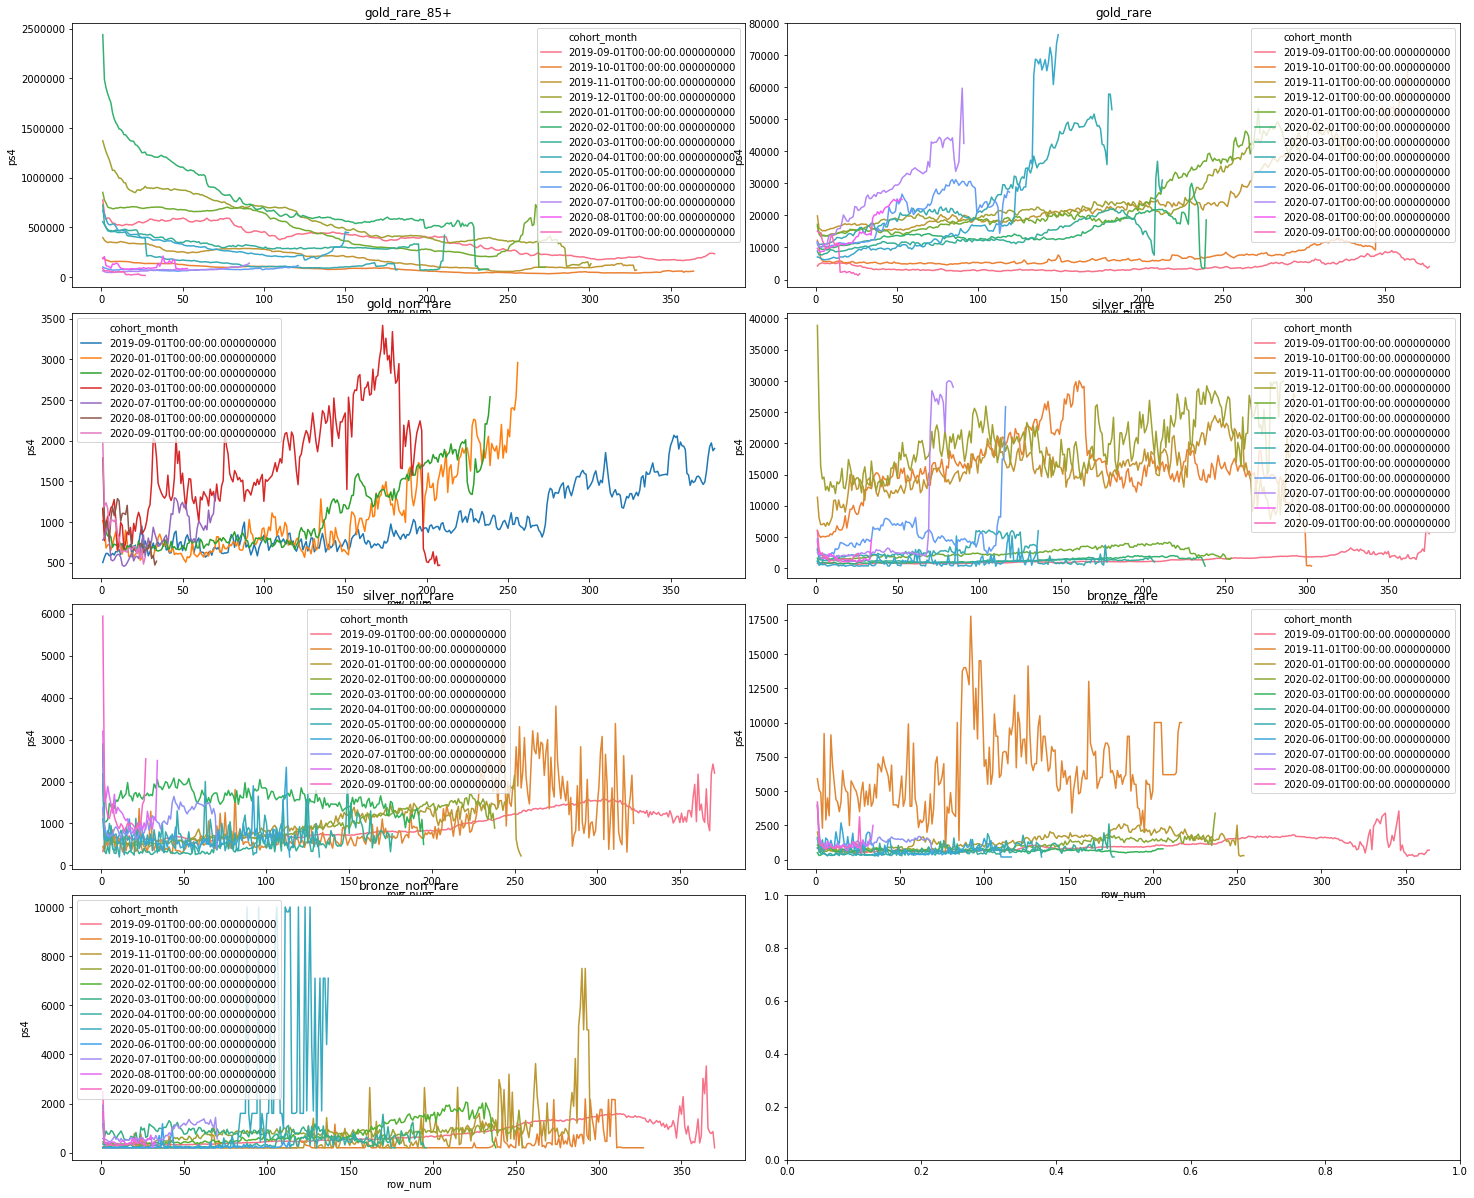

In [44]:
#Plot
horiz = 2
vert = 4
fig, ax = plt.subplots(vert, horiz, figsize = (20,20))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_rare_85, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('gold_rare_85+')

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('gold_rare')

plt.subplot(vert, horiz, 3)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_non_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('gold_non_rare')

plt.subplot(vert, horiz, 4)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_silver_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('silver_rare')

plt.subplot(vert, horiz, 5)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_silver_non_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('silver_non_rare')

plt.subplot(vert, horiz, 6)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_bronze_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('bronze_rare')

plt.subplot(vert, horiz, 7)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_bronze_non_rare, x="row_num", y="ps4", hue='cohort_month', ci = None).set_title('bronze_non_rare')

Charts are extremely noisy and not many new conclusions can be made.
<br>
<br>
The main reason for being noisy, specially on the gold non rare and below is that not every month there is a release of a sigbificant amount of new cards that are not gold rare

[Text(0, 0, '2019-09-01'),
 Text(0, 0, '2019-10-01'),
 Text(0, 0, '2019-11-01'),
 Text(0, 0, '2019-12-01'),
 Text(0, 0, '2020-01-01'),
 Text(0, 0, '2020-02-01'),
 Text(0, 0, '2020-03-01'),
 Text(0, 0, '2020-04-01'),
 Text(0, 0, '2020-05-01'),
 Text(0, 0, '2020-06-01'),
 Text(0, 0, '2020-07-01'),
 Text(0, 0, '2020-08-01'),
 Text(0, 0, '2020-09-01')]

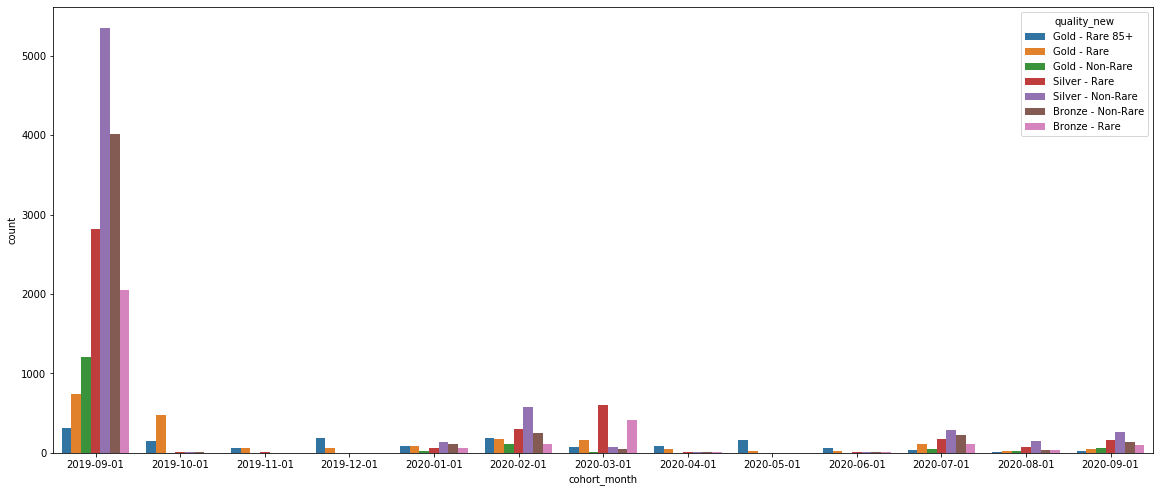

In [45]:
mask = df_20['row_num'] == 1
df20_day_1 = df_20[mask]

#Plotting the count of players by cohort month and quality
horiz = 1
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (16,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.countplot(x="cohort_month", hue="quality_new", data=df20_day_1)

x_dates = df20_day_1['cohort_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates)

#### Let's make a stop here to make it clear how new cards are released
There are basically 3 reasons for a player release:
<br>
> 1 - The game is launched and all players are released with their basic "cards". This explains the peaks on 2019-09
<br>
> 2 - Players change clubs and a new "card" of that player in the new club is released. This explains the peaks on Feb, Mar, Jul, Aug and Sep20, since those months are known for transfer window time in real life
<br>
> 3 - Players get a special card. It could be a real life performance that got the player into the team of the week, team of the season, man of the match etc, or just a special card that EA releases as they wish to add some news to the game
<br>
<br>
De Bruyne, for instance has 5 different cards on FIFA 21

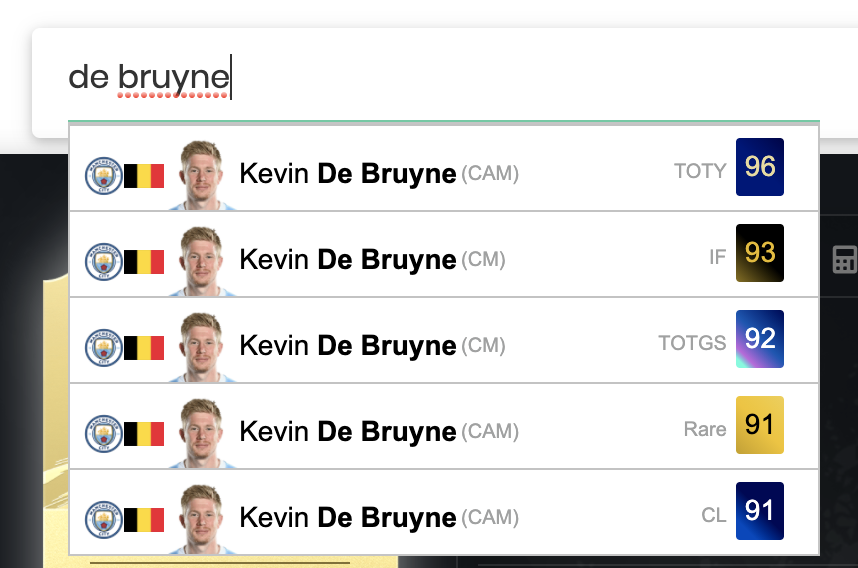

In [46]:
Image(filename='Image3-card_types.png')

##### And there is one thing that is fundamental to know in order to understand price behavior:
Regular cards have supply almost 100% of the time, while special cards supply happens only for a week. To understand why this happen and how this affect the market, let me clarify how supply works:
<br>
<br>
Supply is created as gamers sell their players or open packs with random players in it and list them on the market. Those packs can be bought with real money, with game money or earned via challenges and championships rewards.
<br>
<br>
Special cards are only on packs for a period of one week. Take that 93 rated De Bruyne, this is a special card from the Team of the week (aka in form), so he is on packs only for that week. On the other hand, the regular gold Rare card (and the CL card) are on packs all the time, except when a special card from him is on packs.
<br>
<br>
As a result, we can already imagine how this affects price. Assuming demand is constant, prices will rise for special cards after the one week of pack supply. They will still have supply from gamers selling their 93 De Bruyne, but it reduces week by week, as they are unwilling to sell because whether they are using them or their teams or they have discarded him on a Squad Building Challenge (don't worry about what this challenge is right now. Just understnd that supply drops). On the other hand, regular cards have constant supply trough time

##### Splitting card types

In [48]:
# Counting recurrencies by revision
count_by_revision = df_20.groupby('revision')['futbin_id'].nunique().reset_index().rename(columns={'futbin_id': 'count_revision'})
count_by_revision.sort_values(by=['count_revision'], ascending=False).head(50)

revision  count_revision
17                Normal           17868
34              non-rare            1417
20                  Rare             816
12                    IF             626
24          Sudamericana             525
0                     CL             517
14          Libertadores             486
13                  Icon             358
26                  TOTS             238
33               no info             235
27          TOTW Moments             122
16                  MOTM             113
22                   SIF             113
29          TOTY Nominee              55
3            Europa MOTM              40
15  Libertadores KO Team              30
7           Future Stars              28
6           FUT Birthday              26
23         ShapeShifters              25
9             Headliners              24
18                   OTW              23
11                  Hero              23
25                   TIF              22
8              Halloween              22
30              UCL LIVE              21
1                CL MOTM              18
2                CL TOTT              16
32        Winter Refresh              15
28                  TOTY              12
31              UEL LIVE               6
5                    FIF               5
21        Record Breaker               2
19               PL POTM               2
10    Headliners Upgrade               2
4            Europa TOTT               2

In [49]:
#Simplifying the revision by supply type
df_20["simplified_revision"] = np.where(df_20["revision"].isin(['Normal', 'non-rare', 'Rare','CL', 'Sudamericana', 'Libertadores', 'Icon', 'no info'])
                                       , 'full_supply'
                                       , 'week_supply')


In [50]:
#Reducing the dataset into smaller parts (it is repeating the code from a few steps before, so writing a function is a smarter way. Let's leave as an improvement)
mask = df_20['row_num'] < 300
df_20_short = df_20[mask]


mask = df_20_short['quality_new'] == 'Gold - Rare 85+'
df20_gold_rare_85 = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Gold - Rare'
df20_gold_rare = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Gold - Non-Rare'
df20_gold_non_rare = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Silver - Rare'
df20_silver_rare = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Silver - Non-Rare'
df20_silver_non_rare = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Bronze - Rare'
df20_bronze_rare = df_20_short[mask]

mask = df_20_short['quality_new'] == 'Bronze - Non-Rare'
df20_bronze_non_rare = df_20_short[mask]

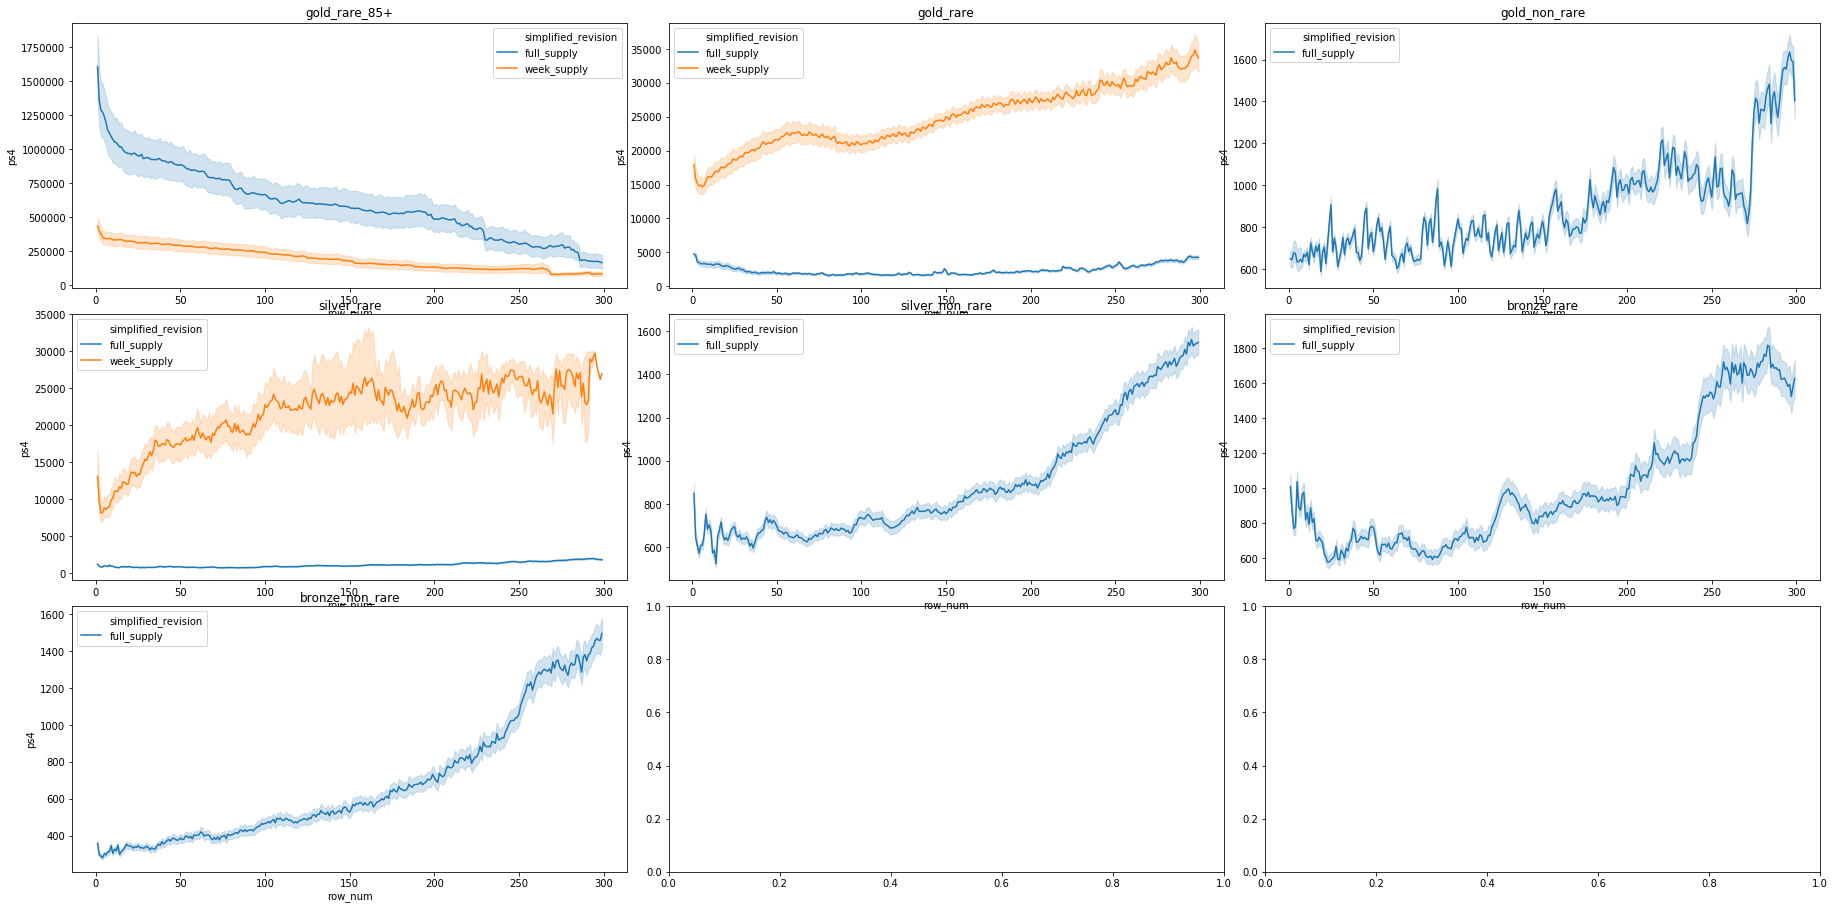

In [51]:
#Price by row number by revision


horiz = 3
vert = 3
fig, ax = plt.subplots(vert, horiz, figsize = (25,15))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_rare_85, x="row_num", y="ps4", hue='simplified_revision').set_title('gold_rare_85+')

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('gold_rare')

plt.subplot(vert, horiz, 3)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_non_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('gold_non_rare')

plt.subplot(vert, horiz, 4)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_silver_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('silver_rare')

plt.subplot(vert, horiz, 5)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_silver_non_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('silver_non_rare')

plt.subplot(vert, horiz, 6)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_bronze_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('bronze_rare')

plt.subplot(vert, horiz, 7)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_bronze_non_rare, x="row_num", y="ps4", hue='simplified_revision').set_title('bronze_non_rare')

Some interesting things to notice:
<br>
> 1 - We can see very clearly how the first week on the week supply cards are distinct from the rest. While there is supply, prices drop pretty fast. After the first week it rapidily increases for 85- players
<br>
> 2 - Supply type splits very well gold rare 85- players
<br>
> 3 - All special cards are Rare
<br>
> 4 - Gold non rares seems to have a day of the week seasonality

##### Another pause here with hypothesis on how demand is affecting the price in each segment
There are two reasons why someone would want to buy a card (aka create demand): they want to use the player on their teams or they want to buy a player to use on a squad building challenge (SBC)
<br>
<br>
Let's talk about the second point first. What is an SBC?
<br>
An SBC is a "game mode" inside ultimate team where you swap a full squad for a great special player. For example, EA releases a special card (that is not in packs or the market) from a great player and asks for 11 players with 83 overall as the average. Gamers go to the market, buy the 83 rated players and swap them for the SBC player. Doing so, gamers are increasing demand from 83 rated players while reducing supply, as these players are not going back to the market. SBCs usually asks for 85- cards
<br>
<br>
Remember when I said that supply comes from packs? Well, people want gold cards for their teams, so they buy gold packs (yes, there is this distinction) more often than silver and bronze packs. As a result, bronze and silver cards have low supply, low game demand, but high SBC demand. Notice that the demand and supply are unbalanced, making the price go up.
<br>
<br>
On the other hand, gold rare players have more supply from more packs being opened, have the demand from gamers wanting good players for their teams, and, finally, they also have demand from SBCs that require high overalls. But why does price drop for 85+ players? My strong hypothesis here is that, as new special cards are released, the old rare gold cards become obsolete as they have lower overalls. People that have a regular De Bruyne on their teams will sell them when a special card that fits De Bruyne position with better stats is released, making supply for the regular card increase, demand decrease and price drop. 
<br>
<br>

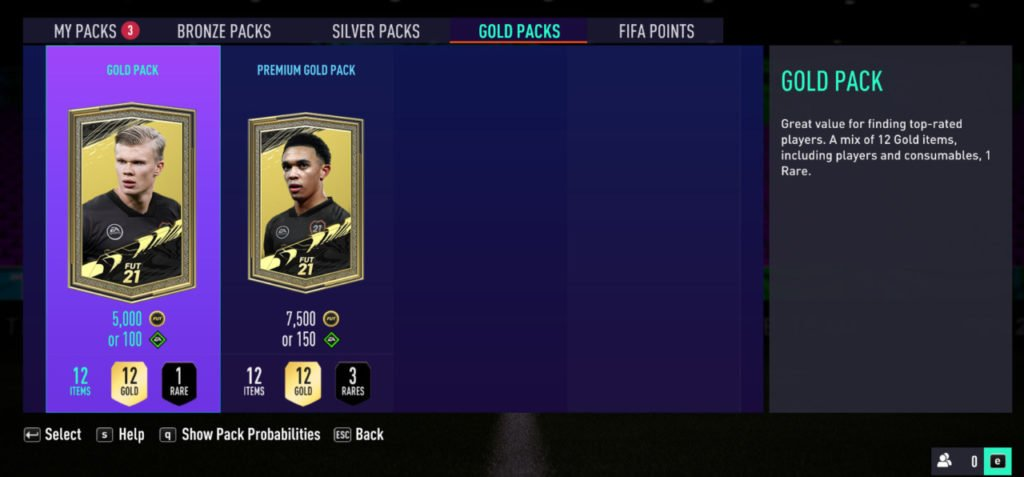

In [52]:
#Packs screen
Image(filename='Image4-packs.jpeg')

We still haven't looked deeply on short term opportunities. We should do it now.
<br>
<br>
By the charts above, we can define some opportunities:
1. If we look at the silver rare week supply, we can see that the price goes from ~8K on row number ~5 to ~12K on row number ~20, which is around +50% in two weeks.
2. Gold rare 85- week supply also have the same shape, but goes from ~15K to ~18K (+20%). Although the return is lower than opportunity 1, it has a shorter confidence interval
3. Gold non rares oscilates a lot so we might look for day of the week variations
<br>
Those 3 strategies have the perk of being possible to be executed during the whole year, as there are new players every week

Silver non rares and bronze players have the constantly growing shape, but there are no clear room for gains of 20%+ on the short term. Still, they have a very steep shape around the last row numbers. However, it is a relevant con the fact that there are very few cohorts from those type of players, which makes the investment dependent on the calendar month if we want to profit from this mentioned steepness

# 8 - Going deep into mapped opportunities

## 8.1 - Silver week supply players 

Checking if the beahior is uniform along all months

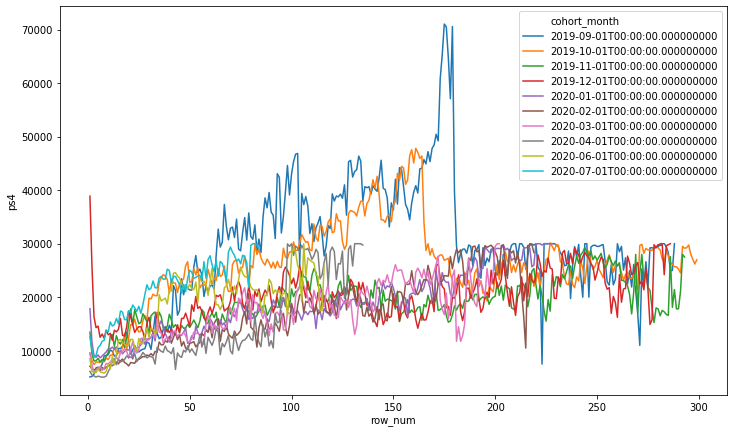

In [53]:
mask = df20_silver_rare['simplified_revision'] == 'week_supply'
df_20_silver_week_sup = df20_silver_rare[mask]

horiz = 1
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (10,7))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_silver_week_sup, x="row_num", y="ps4", hue='cohort_month', ci = None)

Zooming on first days

[(0, 25000)]

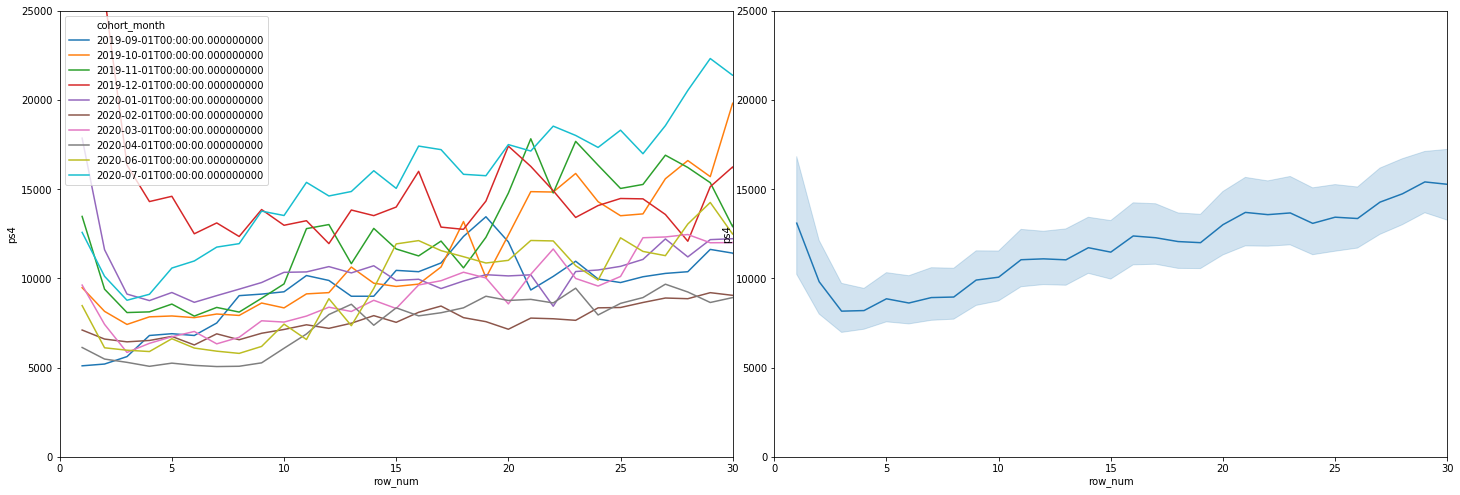

In [54]:
horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (20,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_silver_week_sup, x="row_num", y="ps4", hue='cohort_month', ci = None)
ax.set(xlim=(0, 30))
ax.set(ylim=(0, 25000))

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_silver_week_sup, x="row_num", y="ps4")
ax.set(xlim=(0, 30))
ax.set(ylim=(0, 25000))

In [55]:
mask = df_20_silver_week_sup['row_num'] == 1
df_20_silver_week_sup_day_1 = df_20_silver_week_sup[mask]

df_20_silver_week_sup_day_1.groupby('cohort_month').size()

cohort_month
2019-09-01     1
2019-10-01     5
2019-11-01     5
2019-12-01     3
2020-01-01     5
2020-02-01     4
2020-03-01     4
2020-04-01     2
2020-06-01     4
2020-07-01    13
dtype: int64

Ok, so the behavior seems to repeat month over month, but we are talking about very few players. Basing a investment strategy for FIFA 21 on 4 or 5 players a month from FIFA 20 is quite risky. **Yet, let's check what is the confidence interval of profting over those players**. (A result with inferior confidence interval above 0% profit does not make the investment unrisky, as dynamics could change on FIFA 21)
<br>
<br>
Also, having such a lower number of players makes the ideia of segmenting the players by league, nation, position etc impossible

Before checking the profit distribution, we have to determine when to buy and when to sell. Let's get the day with the average minimum price and say it is the day we will buy the player and check the uplift given a certain sales day

In [56]:
mask = df_20_silver_week_sup['row_num'] <= 30
df_20_silver_week_sup_first_days = df_20_silver_week_sup[mask]

df_20_silver_week_sup_avg = df_20_silver_week_sup_first_days.groupby(['row_num'], as_index=False).mean()
df_20_silver_week_sup_avg_short = df_20_silver_week_sup_avg[['row_num', 'ps4']]

df_20_silver_week_sup_avg_short = df_20_silver_week_sup_avg_short.assign(min_price=df_20_silver_week_sup_avg_short.ps4.min())

df_20_silver_week_sup_avg_short['uplift'] = df_20_silver_week_sup_avg_short[['ps4']].divide(df_20_silver_week_sup_avg_short["min_price"], axis="index")


In [57]:
df_20_silver_week_sup_avg_short

row_num           ps4    min_price    uplift
0         1  13096.847826  8164.021739  1.604215
1         2   9813.847826  8164.021739  1.202085
2         3   8164.021739  8164.021739  1.000000
3         4   8196.847826  8164.021739  1.004021
4         5   8857.434783  8164.021739  1.084935
5         6   8620.543478  8164.021739  1.055919
6         7   8925.222222  8164.021739  1.093238
7         8   8955.644444  8164.021739  1.096965
8         9   9906.777778  8164.021739  1.213468
9        10  10067.733333  8164.021739  1.233183
10       11  11046.600000  8164.021739  1.353083
11       12  11096.222222  8164.021739  1.359161
12       13  11040.755556  8164.021739  1.352367
13       14  11720.511111  8164.021739  1.435630
14       15  11472.488889  8164.021739  1.405250
15       16  12378.688889  8164.021739  1.516249
16       17  12279.155556  8164.021739  1.504057
17       18  12065.022222  8164.021739  1.477828
18       19  12002.777778  8164.021739  1.470204
19       20  13011.088889  8164.021739  1.593711
20       21  13699.044444  8164.021739  1.677977
21       22  13573.955556  8164.021739  1.662655
22       23  13669.068182  8164.021739  1.674306
23       24  13085.318182  8164.021739  1.602803
24       25  13430.863636  8164.021739  1.645128
25       26  13356.500000  8164.021739  1.636020
26       27  14274.772727  8164.021739  1.748498
27       28  14741.431818  8164.021739  1.805658
28       29  15407.886364  8164.021739  1.887291
29       30  15274.977273  8164.021739  1.871011

The best day to buy is 3 days after the player release

Ok, but there is one very important detail that I haven't told you yet. When you sell a player on the market, you have to pay 5% of the sales price in taxes :(
<br><br>
This makes it harder to make profits and we need to take into account on the math

In [58]:
#Tax
Tax = 0.05

#Price after tax
df_20_silver_week_sup_avg_short['ps4_after_tax'] = df_20_silver_week_sup_avg_short['ps4'].mul(1-Tax)

#Uplift after tax
df_20_silver_week_sup_avg_short['uplift_after_tax'] = df_20_silver_week_sup_avg_short[['ps4_after_tax']].divide(df_20_silver_week_sup_avg_short["min_price"], axis="index")

#profit after tax
df_20_silver_week_sup_avg_short['profit_after_tax'] = df_20_silver_week_sup_avg_short['ps4_after_tax'].sub(df_20_silver_week_sup_avg_short['min_price'])


Getting the daily return in order to find the day that maximizes return by day

In [59]:
best_day_to_buy = 3
df_20_silver_week_sup_avg_short['days_since_buy'] = df_20_silver_week_sup_avg_short['row_num'].sub(best_day_to_buy) 
df_20_silver_week_sup_avg_short['return_by_day'] = df_20_silver_week_sup_avg_short['uplift_after_tax'].sub(1.0).divide(df_20_silver_week_sup_avg_short["days_since_buy"])                                                                                                               
                                                                                                                 

Visualizing the daily return

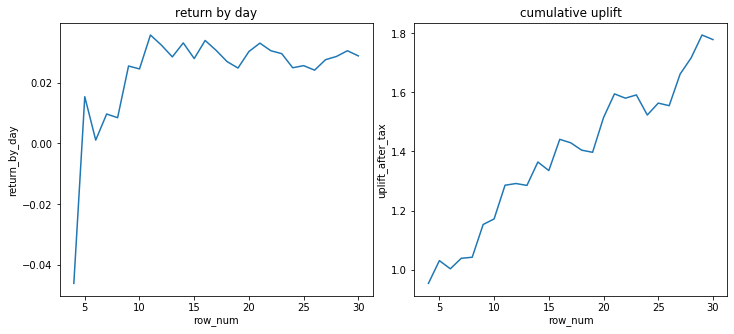

In [60]:
mask = df_20_silver_week_sup_avg_short['row_num'] >= 4
df_20_silver_week_sup_avg_short_plot = df_20_silver_week_sup_avg_short[mask]


horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (10,5))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_silver_week_sup_avg_short_plot, x="row_num", y="return_by_day").set_title('return by day')

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_silver_week_sup_avg_short_plot, x="row_num", y="uplift_after_tax").set_title('cumulative uplift')


Return by day plateaus at around 9 days since player release. Let's use 11 as the sales day as it is the peak together with 12

Let's proceed to see the average profit and confidence intervals for the approach of buying on the 3rd day and selling on the 11th 

Just to be clear, this simplified technique does not necesseraly maximizes return by day. For future improvements, we could find this optimal point by exploring different "buy" days and not only the one with minimum average price

In [61]:
buy_and_sell = df_20_silver_week_sup #Ungrouped dataframe
mask = df_20_silver_week_sup['row_num'].isin([3, 11]) #selecting buy and sell days
buy_and_sell = df_20_silver_week_sup[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'row_num', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='row_num', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={3: "buy", 11: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-Tax)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

Getting the statistics

In [62]:
import scipy.stats as st

mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.3969754660054852 , ci: (1.2052077967474781, 1.5887431352634922)


Uplift distribution

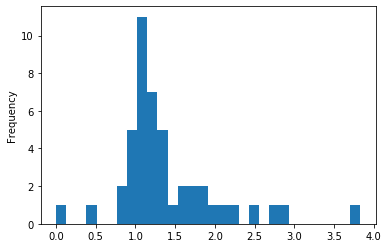

In [63]:
buy_and_sell_pivot['uplift_after_tax'].plot.hist(bins = 30)

**Results look great!!**. We can get an average of 37% in uplift after tax with the inferior confidence interval far from zero in 8 days

You could be asking yourself why am I considering a player worth 10K with the same weight as one worth 50K. Well, we have the freedom to choose whether to buy the same player one time or five times, so if we had 50K we could buy 1 for 50K or 5 for 10K, making the profit and the exposure the same

Although results are great, let's not forget that we are talking about very few players, which creates a risk of things not repeating in the future

## 8.2 - Gold week supply players 

[(0, 30000)]

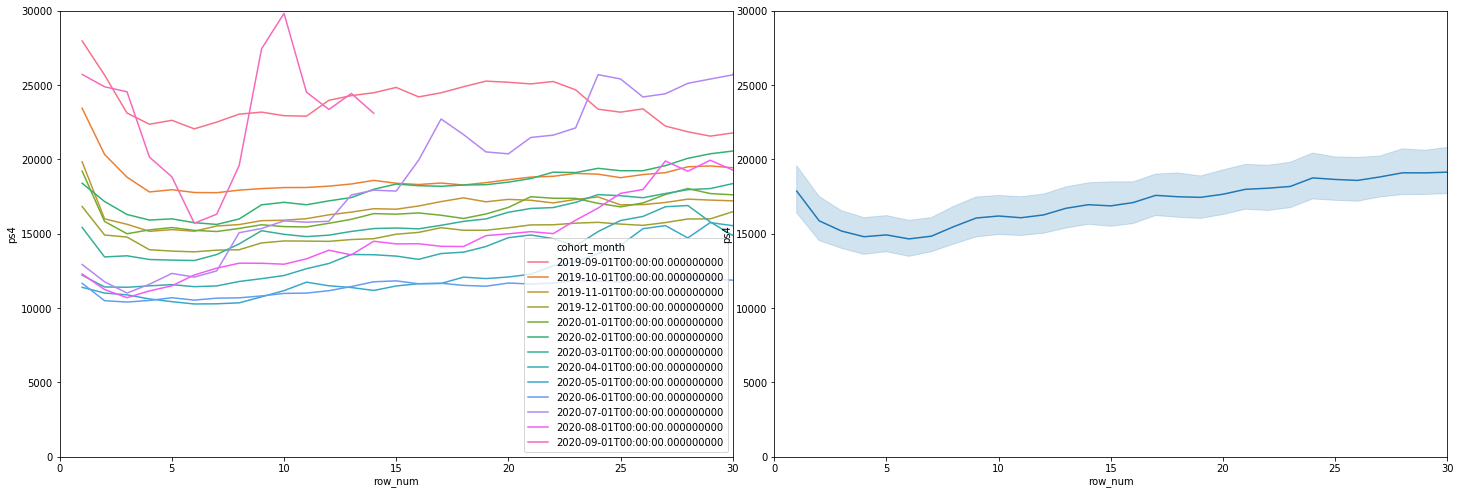

In [64]:
mask = df20_gold_rare['simplified_revision'] == 'week_supply'
df_20_gold_week_sup = df20_gold_rare[mask]

horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (20,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_gold_week_sup, x="row_num", y="ps4", hue='cohort_month', ci = None)
ax.set(xlim=(0, 30))
ax.set(ylim=(0, 30000))

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_gold_week_sup, x="row_num", y="ps4")
ax.set(xlim=(0, 30))
ax.set(ylim=(0, 30000))

No months with weird negative behavior

In [65]:
mask = df_20_gold_week_sup['row_num'] == 1
df_20_gold_week_sup_day_1 = df_20_gold_week_sup[mask]

df_20_gold_week_sup_day_1.groupby('cohort_month').size()

cohort_month
2019-09-01    44
2019-10-01    83
2019-11-01    56
2019-12-01    59
2020-01-01    73
2020-02-01    99
2020-03-01    88
2020-04-01    49
2020-05-01    14
2020-06-01    27
2020-07-01    94
2020-08-01    16
2020-09-01    25
dtype: int64

In [66]:
mask = df_20_gold_week_sup['row_num'] <= 30
df_20_gold_week_sup_first_days = df_20_gold_week_sup[mask]

df_20_gold_week_sup_avg = df_20_gold_week_sup_first_days.groupby(['row_num'], as_index=False).mean()
df_20_gold_week_sup_avg_short = df_20_gold_week_sup_avg[['row_num', 'ps4']]

df_20_gold_week_sup_avg_short = df_20_gold_week_sup_avg_short.assign(min_price=df_20_gold_week_sup_avg_short.ps4.min())

df_20_gold_week_sup_avg_short['uplift'] = df_20_gold_week_sup_avg_short[['ps4']].divide(df_20_gold_week_sup_avg_short["min_price"], axis="index")


In [67]:
df_20_gold_week_sup_avg_short

row_num           ps4     min_price    uplift
0         1  17871.144429  14657.565337  1.219244
1         2  15873.075653  14657.565337  1.082927
2         3  15183.500688  14657.565337  1.035881
3         4  14803.515818  14657.565337  1.009957
4         5  14925.107290  14657.565337  1.018253
5         6  14657.565337  14657.565337  1.000000
6         7  14838.134801  14657.565337  1.012319
7         8  15480.568245  14657.565337  1.056149
8         9  16061.800836  14657.565337  1.095803
9        10  16196.547354  14657.565337  1.104996
10       11  16080.424791  14657.565337  1.097073
11       12  16268.669916  14657.565337  1.109916
12       13  16715.452646  14657.565337  1.140398
13       14  16957.895543  14657.565337  1.156938
14       15  16879.685185  14657.565337  1.151602
15       16  17102.015670  14657.565337  1.166771
16       17  17585.203704  14657.565337  1.199736
17       18  17492.767806  14657.565337  1.193429
18       19  17451.545584  14657.565337  1.190617
19       20  17660.622507  14657.565337  1.204881
20       21  17991.591168  14657.565337  1.227461
21       22  18066.994302  14657.565337  1.232605
22       23  18184.622507  14657.565337  1.240630
23       24  18761.198006  14657.565337  1.279967
24       25  18655.673789  14657.565337  1.272768
25       26  18591.699430  14657.565337  1.268403
26       27  18825.997151  14657.565337  1.284388
27       28  19101.259259  14657.565337  1.303167
28       29  19098.700855  14657.565337  1.302993
29       30  19145.586895  14657.565337  1.306191

Day 6 is the best day to buy

In [68]:
#Price after tax
df_20_gold_week_sup_avg_short['ps4_after_tax'] = df_20_gold_week_sup_avg_short['ps4'].mul(1-Tax)

#Uplift after tax
df_20_gold_week_sup_avg_short['uplift_after_tax'] = df_20_gold_week_sup_avg_short[['ps4_after_tax']].divide(df_20_gold_week_sup_avg_short["min_price"], axis="index")

#profit after tax
df_20_gold_week_sup_avg_short['profit_after_tax'] = df_20_gold_week_sup_avg_short['ps4_after_tax'].sub(df_20_gold_week_sup_avg_short['min_price'])

#Daily return
best_day_to_buy = 6
df_20_gold_week_sup_avg_short['days_since_buy'] = df_20_gold_week_sup_avg_short['row_num'].sub(best_day_to_buy) 
df_20_gold_week_sup_avg_short['return_by_day'] = df_20_gold_week_sup_avg_short['uplift_after_tax'].sub(1.0).divide(df_20_gold_week_sup_avg_short["days_since_buy"])                                                                                                               
                                                                                                                 


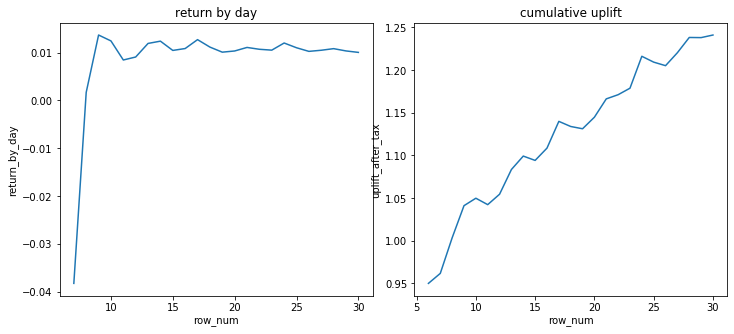

In [69]:
mask = df_20_gold_week_sup_avg_short['row_num'] >= 6
df_20_gold_week_sup_avg_short_plot = df_20_gold_week_sup_avg_short[mask]


horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (10,5))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_gold_week_sup_avg_short_plot, x="row_num", y="return_by_day").set_title('return by day')

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df_20_gold_week_sup_avg_short_plot, x="row_num", y="uplift_after_tax").set_title('cumulative uplift')


Selling on the 9th day seems like a good short term approach. However, selling on the 13th is also good and could be lower risk
<br>
<br>
Evaluating the best day to sell:

**9th** 

In [70]:
buy_and_sell = df_20_gold_week_sup #Ungrouped dataframe
mask = df_20_gold_week_sup['row_num'].isin([6, 9]) #selecting buy and sell days
buy_and_sell = df_20_gold_week_sup[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'row_num', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='row_num', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={6: "buy", 9: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-Tax)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.022515485752969 , ci: (1.005885326023126, 1.039145645482812)


**13th**

In [71]:
buy_and_sell = df_20_gold_week_sup #Ungrouped dataframe
mask = df_20_gold_week_sup['row_num'].isin([6, 13]) #selecting buy and sell days
buy_and_sell = df_20_gold_week_sup[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'row_num', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='row_num', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={6: "buy", 13: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-Tax)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.0636046799223378 , ci: (1.0431558726739492, 1.0840534871707264)


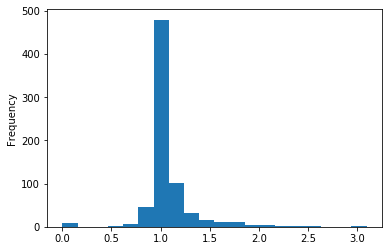

In [72]:
buy_and_sell_pivot['uplift_after_tax'].plot.hist(bins = 20)

Both alternatives are low risk, but let's move on with selling on the 13th because it requires less energy of reinvesting the money for a similar average daily return 

#### In some moments we will explore segmentation strategies to improve the gold investments

# 8.3 - Gold common players 

My best hypothesis for the price volatility is the demand seasonality on the intra week. Those player are not usually in teams, so supply is heavily concentrated on the days people open packs

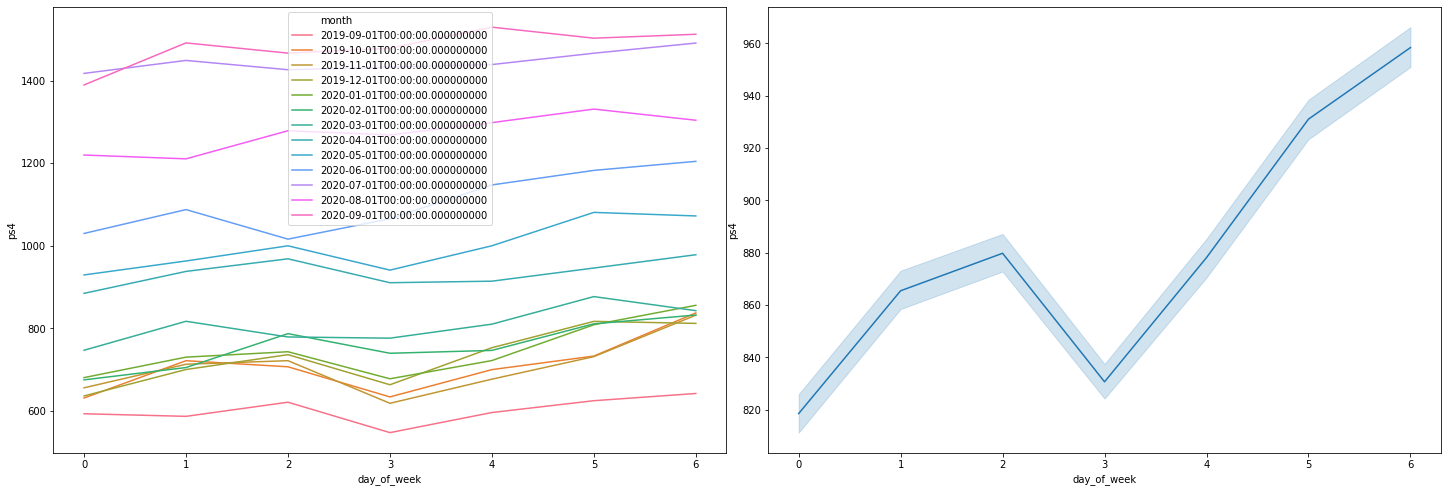

In [73]:
horiz = 2
vert = 1
fig, ax = plt.subplots(vert, horiz, figsize = (20,8))
fig.tight_layout()

plt.subplot(vert, horiz, 1)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_non_rare, x="day_of_week", y="ps4", hue='month', ci = None)

plt.subplot(vert, horiz, 2)
plt.subplots_adjust(bottom=0.2)
ax = sns.lineplot(data=df20_gold_non_rare, x="day_of_week", y="ps4")


In [74]:
#Monday = 0, Sunday = 6

It does match the hypothesis, since Monday and Thursday are reward days. What does that mean?
<br>
<br>
Once a week, gamers receive the weekly rewards based on their performance on the week. On Mondays there are the single player rewards and the online rewards in on Thursdays. Gamers can choose earning coins or packs

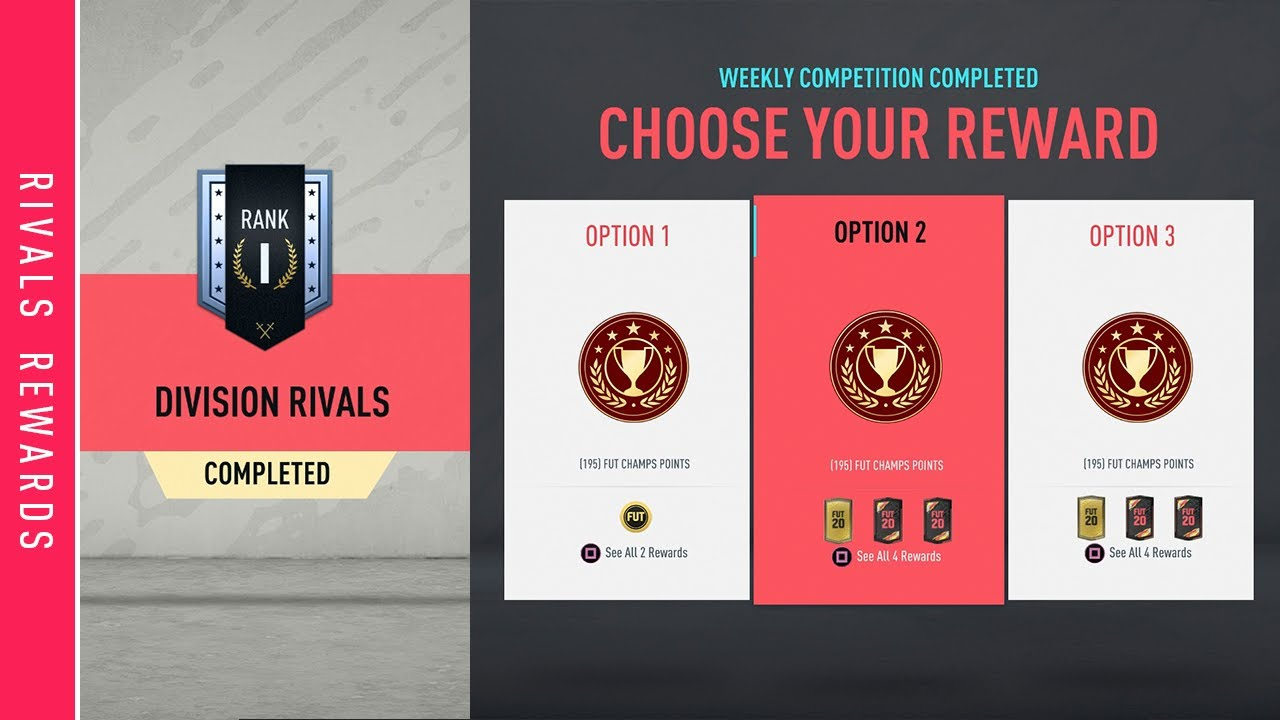

In [75]:
Image(filename='Image5-rewards.jpeg')

In [76]:
df_20_gold_non_rare_avg = df20_gold_non_rare.groupby(['day_of_week'], as_index=False).mean()
df_20_gold_non_rare_avg_short = df_20_gold_non_rare_avg[['day_of_week', 'ps4']]

df_20_gold_non_rare_avg_short = df_20_gold_non_rare_avg_short.assign(min_price=df_20_gold_non_rare_avg_short.ps4.min())

df_20_gold_non_rare_avg_short['uplift'] = df_20_gold_non_rare_avg_short[['ps4']].divide(df_20_gold_non_rare_avg_short["min_price"], axis="index")


In [77]:
df_20_gold_non_rare_avg_short

day_of_week         ps4   min_price    uplift
0          0.0  818.519773  818.519773  1.000000
1          1.0  865.467858  818.519773  1.057357
2          2.0  879.799240  818.519773  1.074866
3          3.0  830.674523  818.519773  1.014850
4          4.0  878.149908  818.519773  1.072851
5          5.0  931.068125  818.519773  1.137502
6          6.0  958.412449  818.519773  1.170909

In [78]:
#Price after tax
df_20_gold_non_rare_avg_short['ps4_after_tax'] = df_20_gold_non_rare_avg_short['ps4'].mul(1-Tax)

#Uplift after tax
df_20_gold_non_rare_avg_short['uplift_after_tax'] = df_20_gold_non_rare_avg_short[['ps4_after_tax']].divide(df_20_gold_non_rare_avg_short["min_price"], axis="index")

#profit after tax
df_20_gold_non_rare_avg_short['profit_after_tax'] = df_20_gold_non_rare_avg_short['ps4_after_tax'].sub(df_20_gold_non_rare_avg_short['min_price'])

#Daily return
best_day_to_buy = 0
df_20_gold_non_rare_avg_short['days_since_buy'] = df_20_gold_non_rare_avg_short['day_of_week'].sub(best_day_to_buy) 
df_20_gold_non_rare_avg_short['return_by_day'] = df_20_gold_non_rare_avg_short['uplift_after_tax'].sub(1.0).divide(df_20_gold_non_rare_avg_short["days_since_buy"])                                                                                                               
                                                                                                                 


In [79]:
df_20_gold_non_rare_avg_short

day_of_week         ps4   min_price    uplift  ps4_after_tax  \
0          0.0  818.519773  818.519773  1.000000     777.593784   
1          1.0  865.467858  818.519773  1.057357     822.194465   
2          2.0  879.799240  818.519773  1.074866     835.809278   
3          3.0  830.674523  818.519773  1.014850     789.140797   
4          4.0  878.149908  818.519773  1.072851     834.242412   
5          5.0  931.068125  818.519773  1.137502     884.514719   
6          6.0  958.412449  818.519773  1.170909     910.491827   

   uplift_after_tax  profit_after_tax  days_since_buy  return_by_day  
0          0.950000        -40.925989             0.0           -inf  
1          1.004489          3.674692             1.0       0.004489  
2          1.021123         17.289505             2.0       0.010561  
3          0.964107        -29.378976             3.0      -0.011964  
4          1.019209         15.722639             4.0       0.004802  
5          1.080627         65.994946             5.0       0.016125  
6          1.112364         91.972054             6.0       0.018727

Buying on Thursday might result in higher daily returns even thought it is not the average minimum price

In [80]:
mask = df_20_gold_non_rare_avg_short['day_of_week'] > 0.0
df_20_gold_non_rare_avg_short = df_20_gold_non_rare_avg_short[mask]

df_20_gold_non_rare_avg_short = df_20_gold_non_rare_avg_short.assign(min_price=df_20_gold_non_rare_avg_short.ps4.min())

df_20_gold_non_rare_avg_short['uplift'] = df_20_gold_non_rare_avg_short[['ps4']].divide(df_20_gold_non_rare_avg_short["min_price"], axis="index")

#Price after tax
df_20_gold_non_rare_avg_short['ps4_after_tax'] = df_20_gold_non_rare_avg_short['ps4'].mul(1-Tax)

#Uplift after tax
df_20_gold_non_rare_avg_short['uplift_after_tax'] = df_20_gold_non_rare_avg_short[['ps4_after_tax']].divide(df_20_gold_non_rare_avg_short["min_price"], axis="index")

#profit after tax
df_20_gold_non_rare_avg_short['profit_after_tax'] = df_20_gold_non_rare_avg_short['ps4_after_tax'].sub(df_20_gold_non_rare_avg_short['min_price'])


#Daily return
best_day_to_buy = 3
df_20_gold_non_rare_avg_short['days_since_buy'] = df_20_gold_non_rare_avg_short['day_of_week'].sub(best_day_to_buy) 
df_20_gold_non_rare_avg_short['return_by_day'] = df_20_gold_non_rare_avg_short['uplift_after_tax'].sub(1.0).divide(df_20_gold_non_rare_avg_short["days_since_buy"])                                                                                                               
                                                                                                                 


In [81]:
df_20_gold_non_rare_avg_short

day_of_week         ps4   min_price    uplift  ps4_after_tax  \
1          1.0  865.467858  830.674523  1.041886     822.194465   
2          2.0  879.799240  830.674523  1.059138     835.809278   
3          3.0  830.674523  830.674523  1.000000     789.140797   
4          4.0  878.149908  830.674523  1.057153     834.242412   
5          5.0  931.068125  830.674523  1.120858     884.514719   
6          6.0  958.412449  830.674523  1.153776     910.491827   

   uplift_after_tax  profit_after_tax  days_since_buy  return_by_day  
1          0.989791         -8.480058            -2.0       0.005104  
2          1.006181          5.134755            -1.0      -0.006181  
3          0.950000        -41.533726             0.0           -inf  
4          1.004295          3.567889             1.0       0.004295  
5          1.064815         53.840196             2.0       0.032408  
6          1.096087         79.817304             3.0       0.032029

The daily return is significantly higher buying on Thursdays and selling on Sundays or Saturdays. Let's keep the sales day on Sunday for the same reason as on the gold rare players

In [82]:
buy_and_sell = df20_gold_non_rare #Ungrouped dataframe
mask = df20_gold_non_rare['day_of_week'].isin([3.0, 6.0]) #selecting buy and sell days
buy_and_sell = df20_gold_non_rare[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'day_of_week', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='day_of_week', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None)) ##This pivot will sum the prices from all the weeks of a certain player, which is fine for the purpose as there are equal number of days of the week for the players

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={3.0: "buy", 6.0: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-Tax)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.091078784147459 , ci: (1.0842825076350877, 1.0978750606598302)


This one is a great short term investment with high inferior confidence interval.
<br>
<br>
One disclaimer is that is that we are not necessarily comparing the price on Thursday vs the price of the same player 3 days after. We are actually looking at the average for the whole year. However, as there is no change in player mix intra week and every week has the same days of week, the comparison is fine

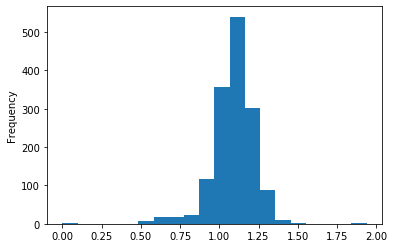

In [83]:
buy_and_sell_pivot['uplift_after_tax'].plot.hist(bins = 20)

# 9 - Improving opportunities by segmenting players by their features

The segmentation below is from a colleague of mine, called Leonardo Amorim, and it uses a Random Forest Regressor to find the best split between treatments given a set of features and conditions

## 9.1 - Gold week supply players 

In [84]:
##A few features first
df_20_gold_week_sup_short = df_20_gold_week_sup[['futbin_id','overall', 'pace', 'dribbling', 'passing', 'shooting', 'defending', 'ps4', 'row_num', 'league']]

mask = df_20_gold_week_sup_short['row_num'].isin([6, 13])
df_20_gold_week_sup_short = df_20_gold_week_sup_short[mask]

df = df_20_gold_week_sup_short.dropna()

df.row_num = df.row_num.replace({6:0, 13:1}) ##Changing to 0 or 1 so the model can interprete it

df["tax_multiplier"] = np.where(df["row_num"] == 1, 0.95, 1.0)

df['price_after_tax'] = df['ps4'].mul(df['tax_multiplier'])

mask = df['row_num'].isin([0])
dfbuy = df[mask]
dfbuy = dfbuy[['futbin_id', 'price_after_tax']].rename(columns={"price_after_tax": "buy_price"})

dffull = df.join(dfbuy.set_index('futbin_id'), on='futbin_id')

##The target metric will be the uplift in price and not the price differences, otherwise it would favor high base prices and not high returns
dffull['uplift_after_tax'] = dffull['price_after_tax'].divide(dffull["buy_price"], axis="index")

df = dffull

/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fklearn.training.pipeline import build_pipeline
from fklearn.training.transformation import onehot_categorizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from econml.metalearners import SLearner

##Features and target
numerical_features = [col for col in df.columns if col not in [
    'price_after_tax',
    'row_num',
    'simplified_revision',
    'league',
    'ps4',
    'tax_multiplier',
    'uplift_after_tax',
    'buy_price',
    'futbin_id'
     ]]

categorical_features = [col for col in df.columns if col in [
    'league'
     ]]

# binary_target = ""
continuous_target = "uplift_after_tax"
treatment = "row_num"

#Random forest base parameters
random_forest_args = {
    "n_estimators": 100,
    "max_depth": 10,
    "bootstrap": True,
    "random_state": 43
}

#Preprocessing function
def preprocess(df):
    global categorical_features
    columns = numerical_features + categorical_features + [continuous_target , treatment]
    df = df[columns]
    onehot_fn = onehot_categorizer(
        columns_to_categorize=categorical_features
    )
    preprocess_fn, preprocessed_df, _ = build_pipeline(onehot_fn)(df)
    features = sorted(list(set(preprocessed_df.columns) - set([continuous_target, treatment] + categorical_features)))
    return preprocess_fn, preprocessed_df, features
preprocess_fn, df, features = preprocess(df)


#Model
continuous_model = SLearner(RandomForestRegressor(**random_forest_args))
continuous_model.fit(
    df[continuous_target].values,
    df[treatment].values,
    df[features].values
)

#Segmentation tree
%matplotlib
def single_tree_intrp(df, model, max_depth=3, figsize=(10, 10)):
    # Controla `max_depth` pra profundidade da arvore e `figsize` pro tamanho do plot.
    from econml.cate_interpreter import SingleTreeCateInterpreter
    global features
    plt.figure(figsize=figsize)
    intrp = SingleTreeCateInterpreter(max_depth=3, min_samples_leaf=50, uncertainty_level=0.1, min_samples_split = 10) #Split conditions
    intrp.interpret(model, df[features].values)
    intrp.plot(feature_names=features, fontsize=10)
    plt.savefig("tree1.png")
    plt.show()

Using matplotlib backend: MacOSX


In [86]:
%matplotlib
single_tree_intrp(df, continuous_model)

Using matplotlib backend: MacOSX


/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


Matplotlib couldn't plot the tree, but I could save as a figure. Here it is:

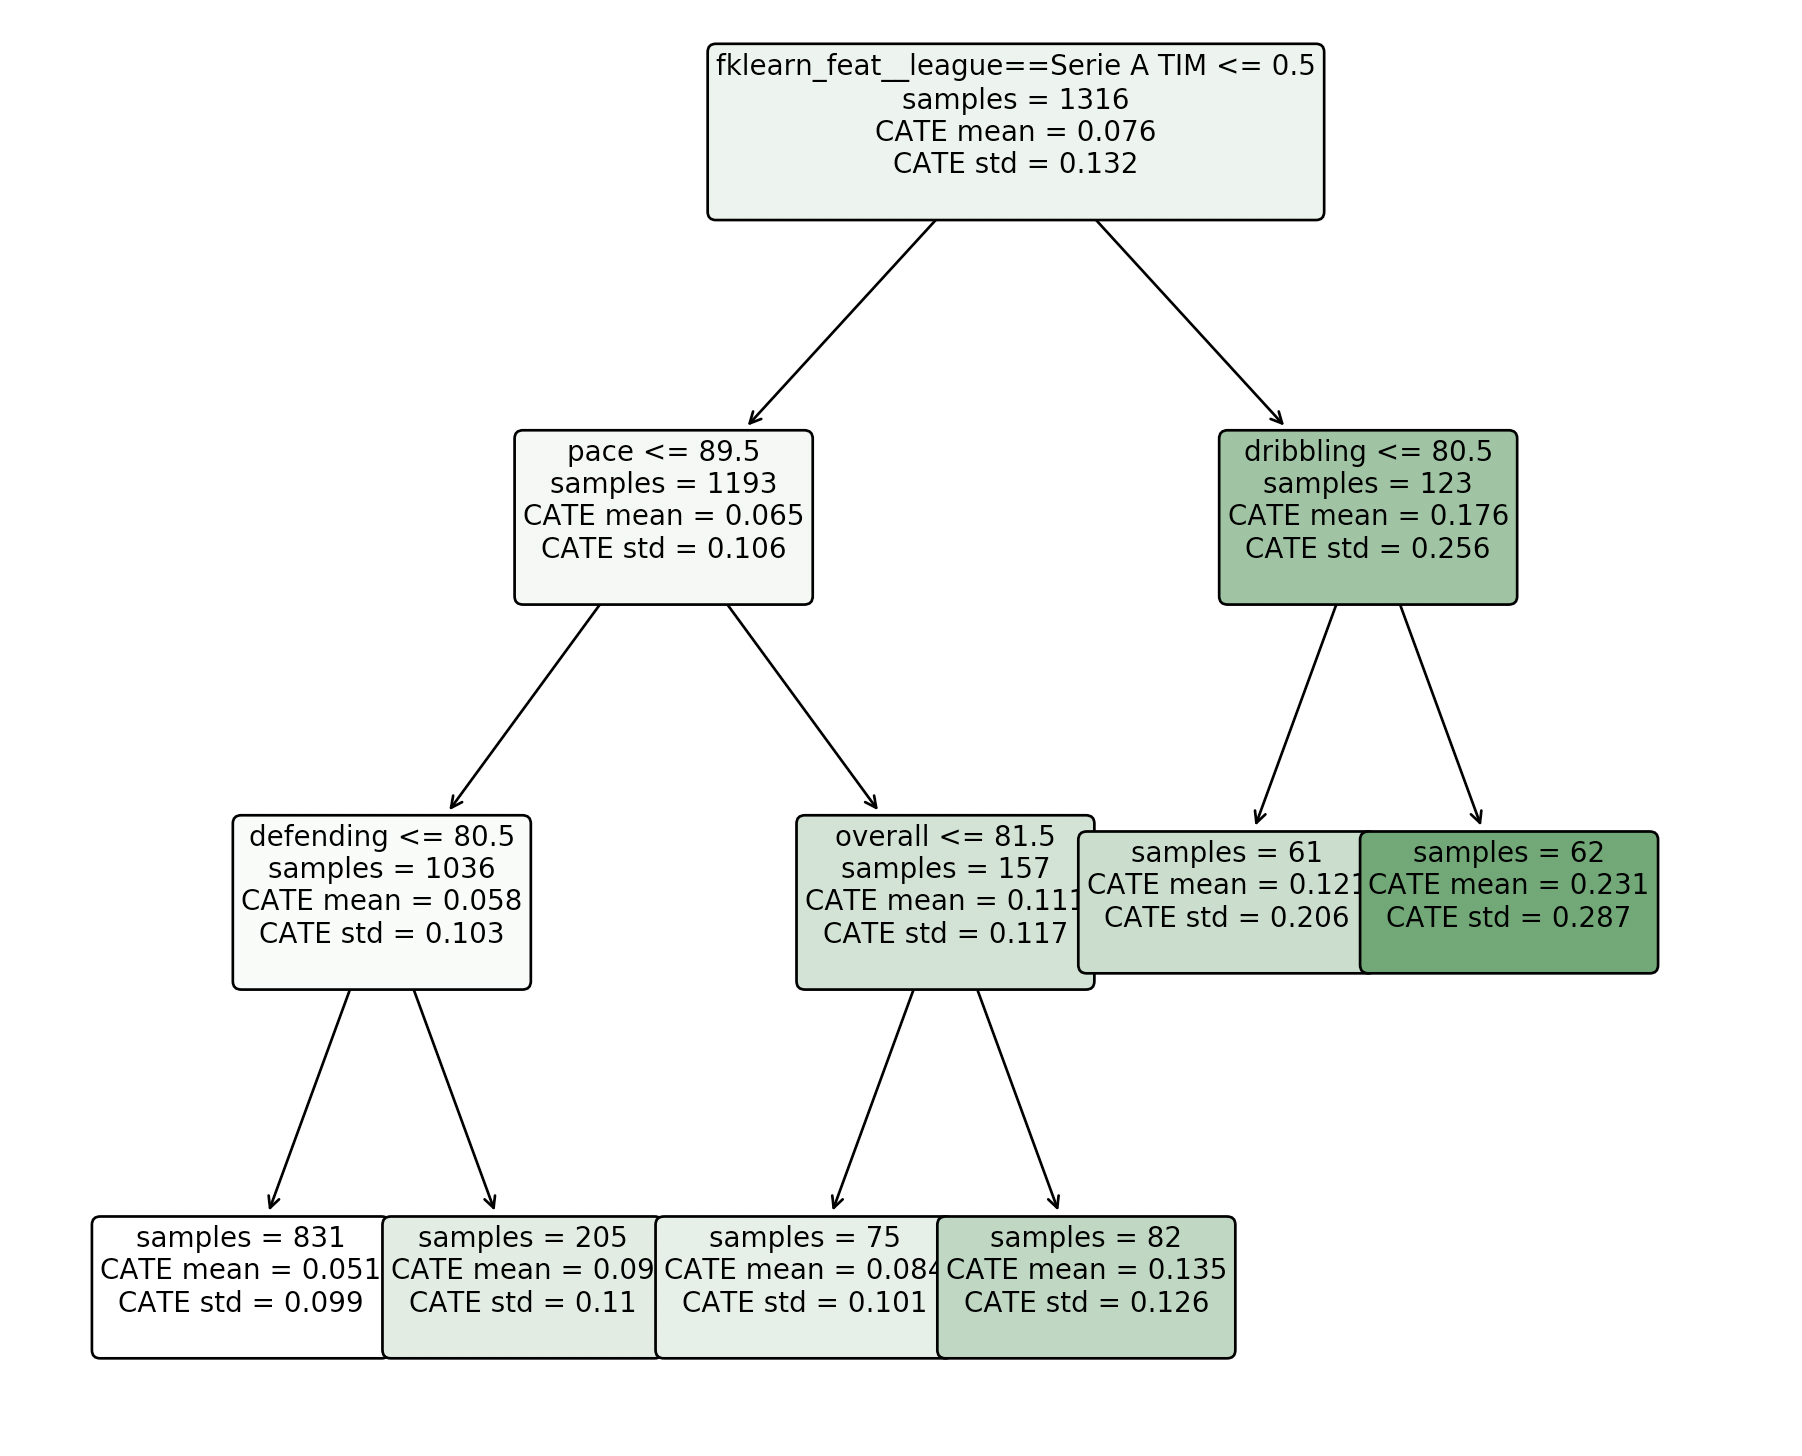

In [87]:
Image(filename='Image6-tree_1.png')

The greener it is, the better it is to invest on the segment. The left split means the condition is true, so we must go for Serie A players with 80.5+ dribbling
<br>
<br>
The splits do make sense. Serie A is one of the most used leagues and 80+ dribbling is a key aspect on how good the player is

Calculating the averge results for the suggested segment

In [88]:
mask = df['fklearn_feat__league==Serie A TIM'] == 1
df_invest = df[mask]

mask = df_invest['dribbling'] >= 80.5
df_invest = df_invest[mask]

mask = df_invest['row_num'] == 1
df_invest = df_invest[mask]

#Results
mean = np.mean(df_invest['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(df_invest['uplift_after_tax'])-1, loc=np.mean(df_invest['uplift_after_tax']), scale=st.sem(df_invest['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.255254916224791 , ci: (1.058770362885804, 1.451739469563778)


We go from a +6.3% (+4.3% inf-CI) to a +25.5% (5.8% inf-CI)

## 9.2 - Gold non rare

In [89]:
##A few features first
df20_gold_non_rare_short = df20_gold_non_rare[['futbin_id','overall', 'pace', 'dribbling', 'passing', 'shooting', 'defending', 'ps4', 'day_of_week', 'league']]

mask = df20_gold_non_rare_short['day_of_week'].isin([3.0, 6.0])
df20_gold_non_rare_short = df20_gold_non_rare_short[mask]

df = df20_gold_non_rare_short.dropna()

df.day_of_week = df.day_of_week.replace({3.0:0, 6.0:1}) ##Changing to 0 or 1 so the model can interprete it

df["tax_multiplier"] = np.where(df["day_of_week"] == 1, 0.95, 1.0)

df['price_after_tax'] = df['ps4'].mul(df['tax_multiplier'])

mask = df['day_of_week'].isin([0])
dfbuy = df[mask]
dfbuy = dfbuy[['futbin_id', 'price_after_tax']].rename(columns={"price_after_tax": "buy_price"})

dffull = df.join(dfbuy.set_index('futbin_id'), on='futbin_id')

##The target metric will be the uplift in price and not the price differences, otherwise it would favor high base prices and not high returns
dffull['uplift_after_tax'] = dffull['price_after_tax'].divide(dffull["buy_price"], axis="index")

df = dffull

/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/henrique.levicovitz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [123]:
##Shortening the df so the model can support the size well
df = dffull.sample(80000)

In [101]:
##Features and target
numerical_features = [col for col in df.columns if col not in [
    'price_after_tax',
    'day_of_week',
    'row_num',
    'simplified_revision',
    'league',
    'ps4',
    'tax_multiplier',
    'uplift_after_tax',
    'buy_price',
    'futbin_id'
     ]]

categorical_features = [col for col in df.columns if col in [
    'league'
     ]]

# binary_target = ""
continuous_target = "uplift_after_tax"
treatment = "day_of_week"

#Random forest base parameters
random_forest_args = {
    "n_estimators": 100,
    "max_depth": 10,
    "bootstrap": True,
    "random_state": 43
}

#Preprocessing function
def preprocess(df):
    global categorical_features
    columns = numerical_features + categorical_features + [continuous_target , treatment]
    df = df[columns]
    onehot_fn = onehot_categorizer(
        columns_to_categorize=categorical_features
    )
    preprocess_fn, preprocessed_df, _ = build_pipeline(onehot_fn)(df)
    features = sorted(list(set(preprocessed_df.columns) - set([continuous_target, treatment] + categorical_features)))
    return preprocess_fn, preprocessed_df, features
preprocess_fn, df, features = preprocess(df)


#Model
continuous_model = SLearner(RandomForestRegressor(**random_forest_args))
continuous_model.fit(
    df[continuous_target].values,
    df[treatment].values,
    df[features].values
)

#Segmentation tree
%matplotlib
def single_tree_intrp(df, model, max_depth=3, figsize=(10, 10)):
    # Controla `max_depth` pra profundidade da arvore e `figsize` pro tamanho do plot.
    from econml.cate_interpreter import SingleTreeCateInterpreter
    global features
    plt.figure(figsize=figsize)
    intrp = SingleTreeCateInterpreter(max_depth=2, min_samples_leaf=3000, uncertainty_level=0.1, min_samples_split = 3000) #Split conditions
    intrp.interpret(model, df[features].values)
    intrp.plot(feature_names=features, fontsize=10)
    plt.savefig("tree1.png")
    plt.show()

Using matplotlib backend: MacOSX


In [102]:
%matplotlib
single_tree_intrp(df, continuous_model)

Using matplotlib backend: MacOSX


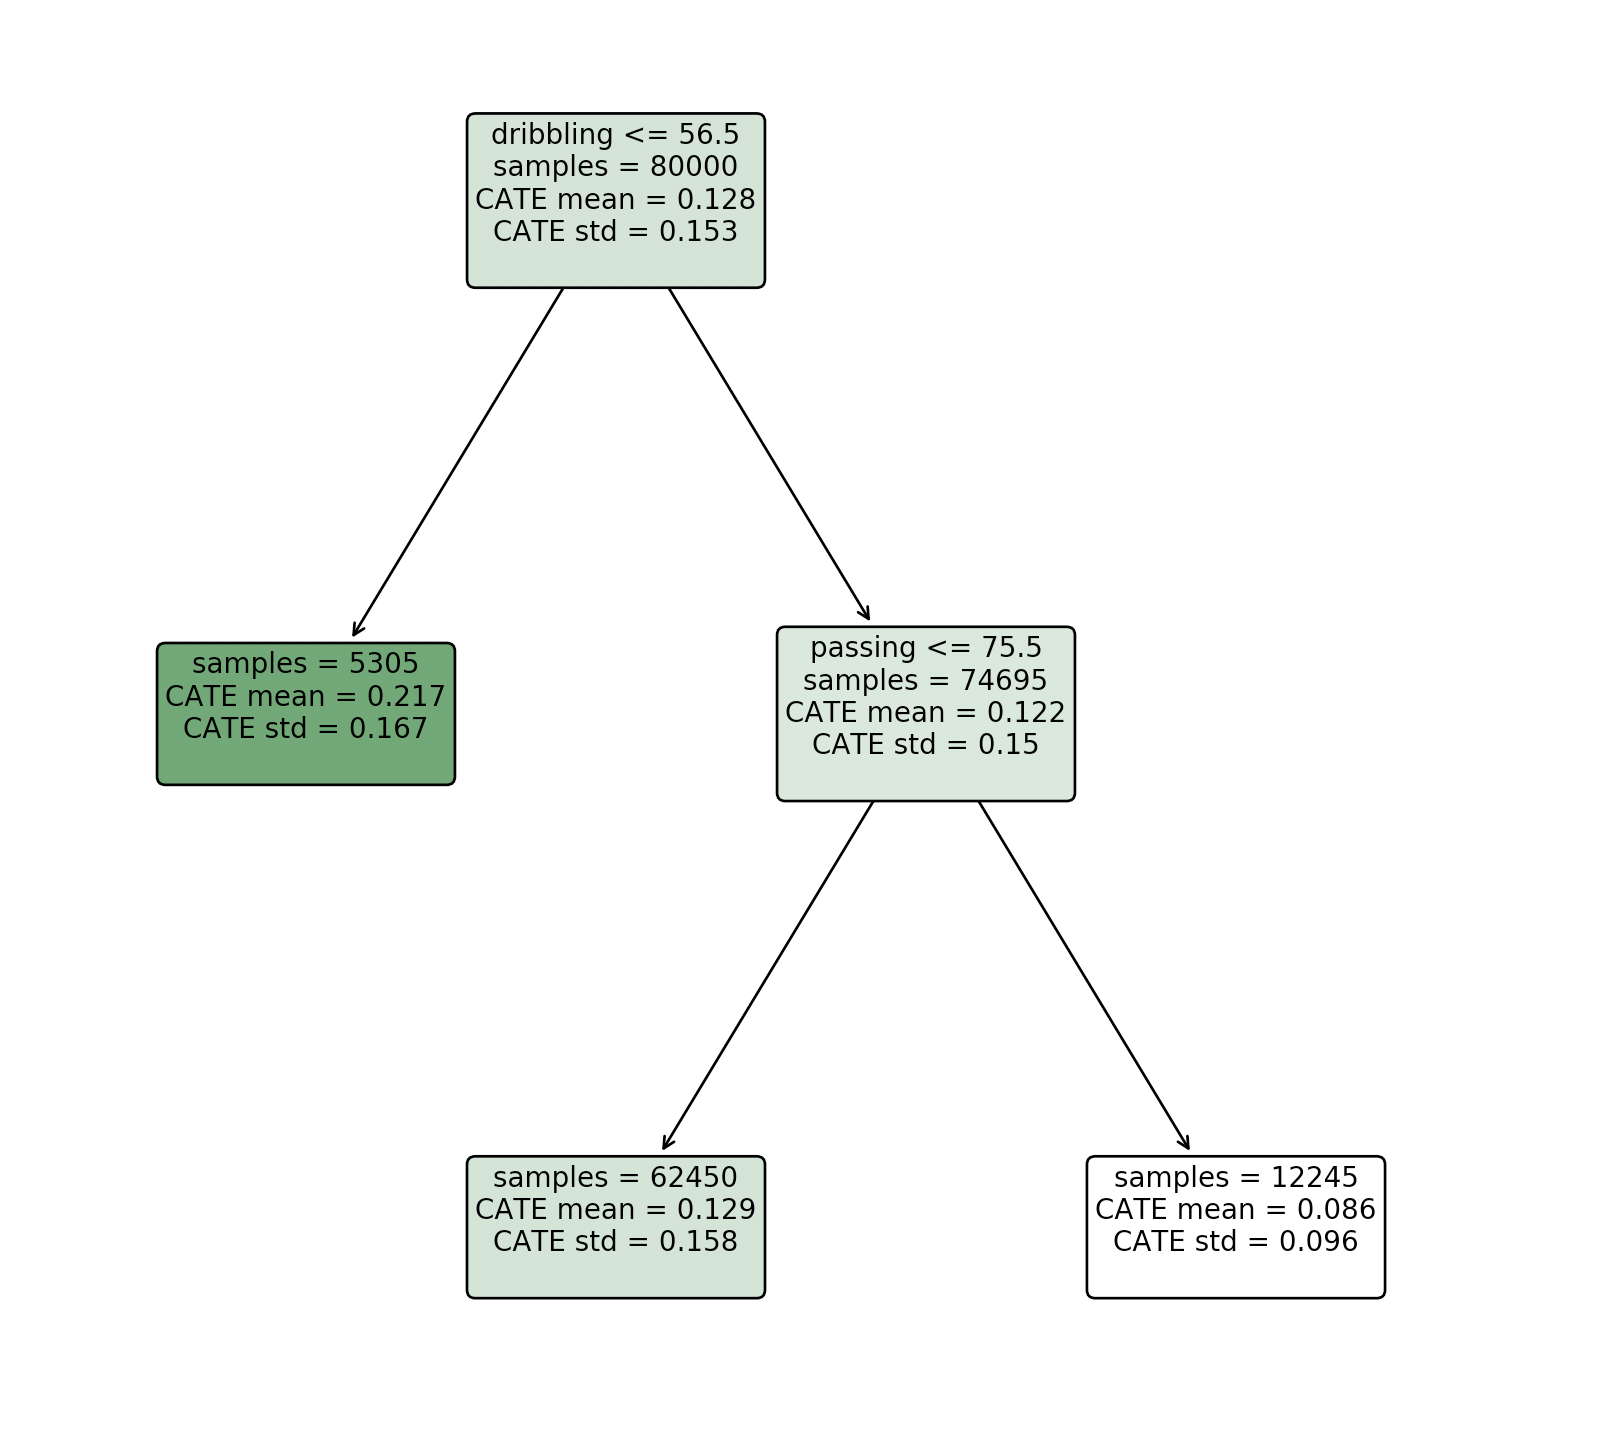

In [122]:
Image(filename='Image7-tree_2.png')

Low dribbling players are apparently the best to invest. Interisting result, since this is a characteristic that makes a player bad ingame, but still useful for SBCs

In [125]:
mask = df['dribbling'] <= 56.5
df_invest = df[mask]

mask = df_invest['day_of_week'] == 1
df_invest = df_invest[mask]

#Results
mean = np.mean(df_invest['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(df_invest['uplift_after_tax'])-1, loc=np.mean(df_invest['uplift_after_tax']), scale=st.sem(df_invest['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)


mean: 1.3653043516451469 , ci: (1.323676153830455, 1.4069325494598388)


In [127]:
df_invest.count()

futbin_id           2624
overall             2624
pace                2624
dribbling           2624
passing             2624
shooting            2624
defending           2624
ps4                 2624
day_of_week         2624
league              2624
tax_multiplier      2624
price_after_tax     2624
buy_price           2624
uplift_after_tax    2624
dtype: int64

While the average investment for gold non rares returns around 9%, this one returns 38% with a reasonable sample size

**So, we ended up with 3 great and short term investment strategies**
1. Buy silver week supply players on the 3rd and sell on the 11th row number
2. Buy gold 85- week supply players on the 6th and sell on the 13th
1. Buy gold no rare players on Thursdays and sell on Sundays

# 10 - Validating the strategy on FIFA 19

In [3]:
#Joinning players and prices
df19 = players19.join(prices19.set_index('resource_id'), on='resource_id')

#Converting date column from object to date
df19['date'] = df19['date'].astype('datetime64')

#Creating a day of week column
df19['day_of_week'] = df19['date'].dt.dayofweek #Monday = 0, Sunday = 6

In [4]:
#It is impossible to buy a player for 0.0 coins. It probably is a bug on the dataset (maybe fill NaN with 0.0)
mask = df19['ps4'] >= 1
df19 = df19[mask]

#Adding row num
df19['row_num'] = df19.sort_values(['futbin_id', 'date'], ascending=True).groupby(['futbin_id']).cumcount() + 1

#Simplifying the revision by supply type
df19["simplified_revision"] = np.where(df19["revision"].isin(['Normal', 'non-rare', 'Non-Rare', 'rare', 'Rare','CL', 'Sudamericana', 'Libertadores', 'Icon', 'no info'])
                                       , 'full_supply'
                                       , 'week_supply')


### SIlver rare 

In [7]:
mask = df19['simplified_revision'] == 'week_supply' 
df_19_week_supply = df19[mask]

mask = df_19_week_supply['quality'] == 'Silver - Rare'
df_19_silver_week_supply = df_19_week_supply[mask]

mask = df_19_silver_week_supply['row_num'].isin([3, 11]) #selecting buy and sell days
buy_and_sell = df_19_silver_week_supply[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'row_num', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='row_num', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={3: "buy", 11: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-0.05)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

In [11]:
#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)

mean: 1.2561059384644804 , ci: (1.1253319635531862, 1.3868799133757745)


In [12]:
buy_and_sell_pivot.count()

row_num
buy                 50
sell                50
sell_after_tax      50
uplift_after_tax    50
dtype: int64

Results on FIFA 19 are similar to FIFA 20, although a bit lower

### Gold rare 

In [66]:
mask = df19['simplified_revision'] == 'week_supply' 
df_19_week_supply = df19[mask]

mask = df_19_week_supply['quality'] == 'Gold - Rare'
df_19_gold_week_supply = df_19_week_supply[mask]

mask = df_19_week_supply['league'] == 'Serie A TIM'
df_19_gold_week_supply = df_19_week_supply[mask]

mask = df_19_week_supply['dribbling'] >= 80.5
df_19_gold_week_supply = df_19_week_supply[mask]

mask = df_19_gold_week_supply['row_num'].isin([6, 13]) #selecting buy and sell days
buy_and_sell = df_19_gold_week_supply[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'row_num', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='row_num', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={6: "buy", 13: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-0.05)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

In [67]:
#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)

mean: 1.0035788134347017 , ci: (0.9882681214525685, 1.018889505416835)


In [23]:
buy_and_sell_pivot.count()

row_num
buy                 881
sell                881
sell_after_tax      881
uplift_after_tax    881
dtype: int64

**This investment wouldn't be successful on FIFA 19**

### Gold non rare 

In [59]:
mask = df19['quality'] == 'Gold - Non-Rare'
df_19_gold_non_rare = df19[mask]

mask = df_19_gold_non_rare['dribbling'] <= 56.5
df_19_gold_non_rare = df_19_gold_non_rare[mask]

mask = df_19_gold_non_rare['day_of_week'].isin([3.0, 6.0]) #selecting buy and sell days
buy_and_sell = df_19_gold_non_rare[mask]
buy_and_sell = buy_and_sell[['futbin_id', 'day_of_week', 'ps4']]

#Pivoting
buy_and_sell_pivot = (buy_and_sell.pivot_table(index='futbin_id', columns='day_of_week', values='ps4', aggfunc = 'sum', fill_value=0).
    rename_axis(index=None))

#Renaming columns
buy_and_sell_pivot = buy_and_sell_pivot.rename(columns={3.0: "buy", 6.0: "sell"})

#Getting the metrics
buy_and_sell_pivot['sell_after_tax'] = buy_and_sell_pivot['sell'].mul(1-0.05)
buy_and_sell_pivot['uplift_after_tax'] = buy_and_sell_pivot[['sell_after_tax']].divide(buy_and_sell_pivot["buy"], axis="index")

mask = buy_and_sell_pivot['buy'] > 0.0
buy_and_sell_pivot = buy_and_sell_pivot[mask]

In [61]:
#Results
mean = np.mean(buy_and_sell_pivot['uplift_after_tax'])
ci = st.t.interval(alpha=0.95, df=len(buy_and_sell_pivot['uplift_after_tax'])-1, loc=np.mean(buy_and_sell_pivot['uplift_after_tax']), scale=st.sem(buy_and_sell_pivot['uplift_after_tax'])) 

print('mean:', mean, ',', 'ci:', ci)

mean: 1.1600278820716288 , ci: (1.1413210458759095, 1.178734718267348)


**The investment wouldn be successful on FIFA 19**

# 11 - Conclusion

Investmenting on FIFA Ultimate team is a skill extremely achiavable since there are simple and effective opportunities to benefit from all the demand and supply predictable fluctuations on the market. Investing on gold non rare and silver week supply player is pretty straigh forward and generates great returns in a period of a few days.
<br>
<br>
However, keep in mind that this isn't the cake recipe for success. **If demand and supply dynamics change, all the suggested strategies could become unuseful. So, the tip here is to use the data as a source of information, but always get to know what are the levers behind the market behavior (this is true for all data analysis I've ever done so far)**. Otherwise, there is a risk you will fail at investing. This could be very tricky and I even made a mistake by not deeply understanding why low dribbling players are the best ones to invest on gold non rare players (lack of time)

As for future improvements, I can list:
1. Deepen the undertanding on player segments instead of just running a model
2. Explore bronze and silver players further
3. Work on a model to predict price by day for each player and use it to find the highest fluctuations
4. Write a code using functions to make it more organized

Besides that, it would be pretty cool to have prices by hour, but we don't have it on the dataset. However, intra day price will follow the same principles: probably between 2AM and 5AM Europe time we would have low demand (most gamers are sleeping), so it would be the best time to buy

Finally, keep in mind that this analysis was done in a short time so there might be mistakes and improvement opportunities. **Feedbacks are welcomed**